###### Top 10 Features Selected

<b> Name: Supreetha Ganapathi </b>
<br>
<b> student id: 011332646 </b>
<br>
Part 2 Update: As part of week 9 update, worked on the Stance Based Feature selection, used sentiment analysis to come up with positive and negative sentences/words and understand the stance of the headlines.
<br>
<br> 1. Reliable Source </br>
<br> 2. Political Affiliation </br>
<br> 3. Sensationalism </br>
<br> 4. Echo Chamber </br>
<br> 5. Social status </br>
<br> 6. Stance-based approach </br>
<br> 7. credibility values (users, posts, and news) </br>
<br> 8. truthfulness of the claims </br>
<br> 9. Domain/Individual/group credibility </br>
<br> 10. content credibility (image/video) </br>



In [1]:
import re
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

import pyLDAvis
import pyLDAvis.gensim



As part of this exercise, used the dataset from 
"https://drive.google.com/open?id=1y3yYF5HHPhH7SyaPwPU9H5HApJzevsFK" to generate 

In [12]:
train_news = pd.read_csv('C://Users//Supreetha//Box Sync//MSSE//THIRD_SEM//257_ML//fake_news//liar_dataset//train.tsv',sep='\t')
test_news = pd.read_csv('C://Users//Supreetha//Box Sync//MSSE//THIRD_SEM//257_ML//fake_news//liar_dataset//test.tsv',sep='\t')
valid_news = pd.read_csv('C://Users//Supreetha//Box Sync//MSSE//THIRD_SEM//257_ML//fake_news//liar_dataset//valid.tsv',sep='\t')

In [13]:
columns = ['id', 'label', 'statement', 'subjects', 'speaker',
         'speaker_job', 'state', 'party', 'barely_true_counts',
         'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
         'context']
train_news.columns = columns
test_news.columns = columns
valid_news.columns = columns


In [14]:
train_news.head(5)

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [15]:
test_news.head(5)

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website


In [16]:
valid_news.head(5)

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
1,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
2,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
3,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News
4,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H."


In [17]:
## ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

<b>For my work on this feature stance detection, I used this paper from Stanford http://cs229.stanford.edu/proj2017/final-reports/5244160.pdf as the baseline and started working towards my goal </b>

In [18]:
train_news=train_news[['label','statement']]

In [19]:
train_news.label.unique()

array(['FALSE', 'half-true', 'mostly-true', 'TRUE', 'barely-true',
       'pants-fire'], dtype=object)

In [20]:
train_news['label']=np.where(train_news['label']=='half-true','true',train_news['label'])
train_news['label']=np.where(train_news['label']=='mostly-true','true',train_news['label'])
train_news['label']=np.where(train_news['label']=='barely-true','false',train_news['label'])
train_news['label']=np.where(train_news['label']=='pants-fire','false',train_news['label'])

In [21]:
train_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
label        10240 non-null object
statement    10240 non-null object
dtypes: object(2)
memory usage: 160.1+ KB


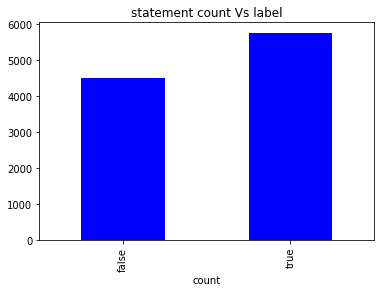

In [15]:
plt.title('statement count Vs label')
train_news.groupby(['label']).size().plot(kind='bar', color='blue')
plt.xlabel('count')
plt.show()


<b> Pre-Processing </b>
<br>
<b> Made use of SPACY, an NLP processing library for Tokenization, Lemmatization, removal of stop words and parsing 
</b>

In [ ]:
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [23]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(train_news['statement']))

print(data_words[:1])

[['says', 'the', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'on', 'demand']]


<b> Bi-grams are two words frequently occuring together in the document and Tri-grams are the three words frequently occuring together in the document </b>

In [57]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['says', 'the', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'on', 'demand']


In [58]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [26]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['say', 'annie', 'list', 'political', 'group', 'support', 'third', 'trimester', 'abortion', 'demand']]


<b> "Detect Number of positive/Negative words" </b>
<br>
<b>Senticnet, an open source dictionary provides denotating and connotative information associated with words. The way this dictionary is built is by using the implicit meaning associated with concepts/statements </b>
<br>
<b>Senticnet dictionary provides for each word if it’s a positive or negative word with intensity. </b>

In [59]:
from sklearn.preprocessing import scale

sent_dict = pd.read_csv('C://Users//Supreetha//Box Sync//MSSE//THIRD_SEM//257_ML//fake_news//liar_dataset//SenticNet.txt', sep="\t+", header=None, usecols=[0,1,2], 
                             names = ["Token", "Polarity", "Intensity"])
sent_dict = sent_dict[~sent_dict['Token'].str.contains('|'.join('_'),na=False)]
sent_dict = sent_dict.reset_index(drop=True)
print("Senticnet Vocab Size: ",len(sent_dict))
print(sent_dict.head(10))

Senticnet Vocab Size:  39892
         Token  Polarity  Intensity
0      CONCEPT  POLARITY  INTENSITY
1      abandon  negative      -0.84
2    abandoned  negative      -0.85
3  abandonment  negative      -0.82
4        abase  negative      -0.90
5    abasement  negative      -0.90
6        abash  negative      -0.77
7      abashed  negative      -0.92
8    abashment  negative      -0.76
9       abasia  negative      -0.67


In [60]:
sent_dict.head(5)

,Token,Polarity,Intensity
0,CONCEPT,POLARITY,INTENSITY
1,abandon,negative,-0.84
2,abandoned,negative,-0.85
3,abandonment,negative,-0.82
4,abase,negative,-0.90


In [ ]:
sent_analysis = (nltk.word_tokenize(train_news['statement'][0]))
print("\n Polarity of word - list : ", (sent_dict[sent_dict.Token == sent_analysis[2]]).Polarity.any())
print("\n Intensity of word - list : ", float( (sent_dict[sent_dict.Token == sent_analysis[2]]).Intensity ))

<b> Each token from the corpus is compared with the sentinect dictionary </b>

In [62]:
senti_word_vector = []
def create_sentiment_vector(sentence):
    sentence_sentiment_vector=np.array([])    
    pol_score=[]
    intensity = []
    
    for word in sentence:        
        token_lower = word.lower()
        lemma_token = nltk.WordNetLemmatizer().lemmatize(token_lower)        
        if token_lower is 'not':
            pol_score =  np.append(pol_score, -1)
            intensity =  np.append(intensity, -1)
            
        elif lemma_token in sent_dict.Token.values:
            sent_dict_object = sent_dict.loc[sent_dict.Token == lemma_token]
            polarity = -1 if sent_dict_object.Polarity.any()  == 'negative' else 1
            pol_score = np.append(pol_score, polarity)
            intensity = np.append(intensity, float(sent_dict_object.Intensity))

        else:
            pol_score =  np.append(pol_score, 0)
            intensity =  np.append(intensity, 0)
    pol_score = float(sum(pol_score))/len(pol_score)
    senti_word_vector.append(intensity)
    intensity = float(sum(intensity))/len(intensity)
    
    sentence_sentiment_vector = np.append(sentence_sentiment_vector,[pol_score, intensity])
    return sentence_sentiment_vector

In [ ]:
import nltk
nltk.download('wordnet')

sentiment_polarity = []
sentiment_score = []
for index, row in train_news.iterrows():
    sentence = nltk.word_tokenize(row['statement'])
    senti_data = create_sentiment_vector(sentence)
    
    polarity = 1 if senti_data[0] > 0 else 0
    sentiment_polarity.append(polarity)
    sentiment_score.append(senti_data[1])

print("score: ", sentiment_score) 
print("polarity: ", sentiment_polarity)

print(senti_word_vector)

train_news['senti_score'] = sentiment_score
train_news['senti_polarity'] = sentiment_polarity

<b> Code to calculate the score and polarity of the news headline </b>

In [37]:
train_news['senti_word_vector'] =senti_word_vector

In [38]:
train_news.head(5)

,label,statement,senti_score,senti_polarity,senti_word_vector
0,true,When did the decline of coal start? It started...,0.095036,1,"[0.0, 0.0, 0.935, -0.05, 0.939, -0.78, 0.08, 0..."
1,true,"Hillary Clinton agrees with John McCain ""by vo...",0.202591,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.771..."
2,false,Health care reform legislation is likely to ma...,0.274000,1,"[0.857, 0.784, -0.89, 0.084, 0.0, 0.122, 0.789..."
3,true,The economic turnaround started at the end of ...,0.335545,1,"[0.935, 0.836, 0.0, 0.0, 0.0, 0.935, 0.046, 0...."
4,true,The Chicago Bears have had more starting quart...,0.141333,1,"[0.935, 0.0, 0.773, 0.713, 0.0, 0.0, 0.0, 0.04..."


In [ ]:
sentiment_polarity = [] 
sentiment_score = []
senti_word_vector = []

for index, row in test_news.iterrows():
    sentence = nltk.word_tokenize(row['statement'])
    senti_vect = create_sentiment_vector(sentence)
    polarity = 1 if senti_vect[0] > 0 else 0
    sentiment_polarity.append(polarity)
    sentiment_score.append(senti_vect[1])
    
test_news['senti_score'] = sentiment_score
test_news['senti_polarity'] = sentiment_polarity
test_news['senti_word_vector'] =senti_word_vector

<b> Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency) </b>

In [34]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


In [35]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abortion', 1),
  ('annie', 1),
  ('demand', 1),
  ('group', 1),
  ('list', 1),
  ('political', 1),
  ('say', 1),
  ('support', 1),
  ('third', 1),
  ('trimester', 1)]]

<b> Build the LDA model based on the Dictionary and Corpus </b>

In [152]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

<b> Below are the top 20 topics printed with each topic ( combination of keywords) and each keyword providing the weightage to topics </b>

In [26]:

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.066*"law" + 0.062*"new" + 0.043*"first" + 0.041*"governor" + '
  '0.033*"woman" + 0.029*"run" + 0.028*"less" + 0.026*"include" + '
  '0.024*"private" + 0.021*"good"'),
 (1,
  '0.141*"tax" + 0.064*"pay" + 0.042*"increase" + 0.041*"budget" + '
  '0.040*"want" + 0.039*"florida" + 0.028*"raise" + 0.028*"nation" + '
  '0.027*"cost" + 0.027*"average"'),
 (2,
  '0.236*"percent" + 0.096*"people" + 0.072*"american" + 0.033*"income" + '
  '0.033*"help" + 0.033*"give" + 0.022*"worker" + 0.017*"back" + '
  '0.015*"rhode_island" + 0.015*"hour"'),
 (3,
  '0.099*"go" + 0.054*"spend" + 0.043*"come" + 0.042*"democrat" + 0.039*"even" '
  '+ 0.038*"be" + 0.030*"administration" + 0.026*"month" + 0.021*"virginia" + '
  '0.020*"bush"'),
 (4,
  '0.256*"say" + 0.058*"president" + 0.054*"would" + 0.041*"bill" + '
  '0.036*"obama" + 0.029*"barack_obama" + 0.026*"take" + 0.024*"obamacare" + '
  '0.024*"have" + 0.015*"allow"'),
 (5,
  '0.073*"support" + 0.047*"work" + 0.038*"large" + 0.038*"right" + '
 

<b> pyLDAvis package provides a interactive chart and works well with Jupyter notebooks </b>
<br>
<b> Each bubble on the left side displayes a topic, larger the bubble more prevalent is the topic </b>
<br>

In [29]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.430354 -0.101368       1        1  10.538481
1      0.075924  0.422851       2        1   7.037120
11    -0.012428 -0.015152       3        1   5.976016
15    -0.004221 -0.006298       4        1   5.484532
12    -0.007968 -0.008950       5        1   5.469335
2     -0.010516 -0.004391       6        1   5.370104
3     -0.015442 -0.011989       7        1   5.176173
14    -0.000456  0.007081       8        1   4.993430
0     -0.031713 -0.022474       9        1   4.941550
9     -0.028199 -0.015768      10        1   4.763288
17    -0.028123 -0.023288      11        1   4.568658
19    -0.025123 -0.016839      12        1   4.567202
5     -0.034202 -0.021185      13        1   4.424119
10    -0.038572 -0.023690      14        1   4.125421
7     -0.040550 -0.025404      15        1   4.058740
16    -0.041176 -0.024526      16        1   4.053265
6     -0.045147 -0.026981      17        1   3.828266
13    -0.044305 -0.027239      18        1   3.684247
18    -0.047555 -0.027817      19        1   3.522035
8     -0.050582 -0.026574      20        1   3.418021, topic_info=     Category         Freq               Term        Total  loglift  logprob
term                                                                        
79    Default  2621.000000                say  2621.000000  30.0000  30.0000
123   Default  1234.000000            percent  1234.000000  29.0000  29.0000
38    Default  1087.000000               year  1087.000000  28.0000  28.0000
215   Default   909.000000              state   909.000000  27.0000  27.0000
166   Default   964.000000                tax   964.000000  26.0000  26.0000
80    Default   542.000000               vote   542.000000  25.0000  25.0000
103   Default   549.000000                not   549.000000  24.0000  24.0000
356   Default   532.000000                job   532.000000  23.0000  23.0000
138   Default   499.000000                 go   499.000000  22.0000  22.0000
122   Default   500.000000             people   500.000000  21.0000  21.0000
5     Default   596.000000          president   596.000000  20.0000  20.0000
379   Default   446.000000                get   446.000000  19.0000  19.0000
96    Default   421.000000                cut   421.000000  18.0000  18.0000
336   Default   556.000000              would   556.000000  17.0000  17.0000
227   Default   442.000000                pay   442.000000  16.0000  16.0000
18    Default   378.000000        health_care   378.000000  15.0000  15.0000
89    Default   401.000000               time   401.000000  14.0000  14.0000
90    Default   377.000000           american   377.000000  13.0000  13.0000
128   Default   343.000000               make   343.000000  12.0000  12.0000
396   Default   342.000000         republican   342.000000  11.0000  11.0000
97    Default   363.000000                 do   363.000000  10.0000  10.0000
193   Default   332.000000              texas   332.000000   9.0000   9.0000
1326  Default   316.000000          wisconsin   316.000000   8.0000   8.0000
338   Default   301.000000            country   301.000000   7.0000   7.0000
484   Default   314.000000            support   314.000000   6.0000   6.0000
271   Default   317.000000                law   317.000000   5.0000   5.0000
573   Default   416.000000               bill   416.000000   4.0000   4.0000
233   Default   320.000000            federal   320.000000   3.0000   3.0000
60    Default   296.000000                new   296.000000   2.0000   2.0000
98    Default   301.000000         government   301.000000   1.0000   1.0000
...       ...          ...                ...          ...      ...      ...
1181  Topic20   168.604691             senate   169.475830   3.3710  -2.9817
680   Topic20   147.500534           spending   148.371674   3.3702  -3.1154
46    Topic20   135.822159               pass   136.693298   3.3697  -3.19

<b> Similarity </b>

In [78]:
# Based on the lda weight, and also counts from count vectorizor , prepared sample document consisting of words
# that have higher weights

sample_doc=nlp(u'people  tax percent say year income states republican government rates when start \
president trump voting reform turnaround term total years represents time smaller popular suspended \
spending united states of america remains texas supporter work today suggested')

In [88]:
import spacy
nlp = spacy.load('en')
for index, row in train_news.iterrows():
    sentence = row['statement']
    print(sentence)
    print(sample_doc.similarity(nlp(sentence)))


When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.
0.576074716672546
Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
0.31985177410964427
Health care reform legislation is likely to mandate free sex change surgeries.
0.8434485648570502
The economic turnaround started at the end of my term.
0.5620966956353137
The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.
0.6137217446227063
Jim Dunnam has not lived in the district he represents for years now.
0.34375920519323805
I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate.
0.5810264688161246
However, it took $19.5 million in Oregon Lottery funds for the Port of Newport to eventually land 

0.7212447515811492
Says U.S. Rep. Steve Southerland voted to keep the shutdown going.
0.3858837023037239
In Rick Perrys Texas, we import nurses ... from other countries.
0.5059323761251253
There is a federal criminal law that says its a crime to transport dentures across state lines.
0.6549500306865343
We built a new prison every 10 days between 1990 and 2005 to keep up with our mass incarceration explosion of nonviolent offenders.
0.6738086850089947
Sen. McCain's tax plan provides "virtually nothing to the middle class."
0.6161793218066904
Austin is burdened by the fastest-growing tax increases of any major city in the nation.
0.5881945199209633
Phoenix, Arizona, is the No. 2 kidnapping capital of the world.
0.4774906601818452
I belong to the AFL-CIO.
0.2959588372797839
The insurance commissioner cant do squat about health care.
0.66776181412352
Says a poll found him the only Republican candidate who could beat Barack Obama in Texas -- and by eight points.
0.5149274389064229
President

0.6334190897789969
Climate change is directly related to the growth of terrorism.
0.6414107155334264
The jobs bill includes President Obamas tax on soup kitchens
0.7413220135445043
Says the Obama administration spent taxpayer dollars on electric cars in Finland (and) windmills in China.
0.5848781605719475
While Sarah was Mayor of Wasilla she tried to fire our highly respected City Librarian because the Librarian refused to consider removing from the library some books that Sarah wanted removed.
0.4335797570024731
If Milwaukee approves reducing its maximum forfeiture for marijuana possession to $50, the city would have 23 different bicycle violations that have a higher forfeiture.
0.7128904683558054
We have more illegal immigrants here than we did five years ago.
0.3575126833439194
Says Rick Perry wrote a letter supporting Hillarycare.
0.35891214187131415
The U.S. Patent and Trademark Office received zero complaints about the Washington Redskins name.
0.4696943407064888
The presidents h

0.692443892199594
Says cuts to Medicare affect people who have already paid in. We paid for it.
0.3277592949965756
David Alameel is giving thousands of dollars to support the Republican Party candidates including John Cornyn and Greg Abbott.
0.2906980057396602
The American healthcare system burns 18 percent of our national GDP. Nobody else is close.
0.7354771972967176
Providences port is 200 miles closer to Europe than any other Eastern port.
0.5797563623415101
Says you need a photo ID to purchase Sudafed in Texas.
0.3879809850453025
Twenty percent of housing in Portlands Pearl District is affordable.
0.6410670180957784
Says allowing the payroll tax holiday to expire would end up costing another estimated 900,000 jobs in 2012.
0.5824078351660449
Hillary Clinton supported NAFTA and permanent China trade. Pennsylvania lost thousands of jobs.
0.5020597723746882
Numerous studies have shown that these so-called right-to-work laws do not generate jobs and economic growth.
0.5842871716165483


0.696312552048096
This year in Congress (Connie Mack IV) has missed almost half of his votes.
0.4508338108265777
1/3 of our kids drop out (of high school), cannot go to college or start a career.
0.5360408314554473
Not even old Gen. Eisenhower saluted military personnel as president.
0.6135574558596998
If Wisconsins governor cuts perquisites as much as he plans to do, it would still leave (workers) better off than their private sector counterparts.
0.5343565565941941
You cant get on an airplane, but more than 2,000 people on that list have been able to buy a gun.
0.43571780654468584
74 percent of Republicans support the Affordable Care Act.
0.48831481401888954
For every $1 spent on afterschool programs, we can save over $5, almost $6, in crime costs down the line.
0.390097897503609
The federal government has $3 trillion in cash flow, so we can pay our bills and wont default.
0.5804411906152332
Says Alex Sink failed Florida homeowners by using predatory lending practices.
0.665549929780

0.6043138586471468
Says Georgia will send more state money per child to state charter schools and that budget cuts are not applied to those charter schools.
0.7668014705016769
Jorge Elorza wants to impose a municipal income tax.
0.5609941157678292
The Supreme Court cant overrule the other two branchesof government.
0.45468747323143127
Roughly 25% of RI has a criminal record
0.5811562569886932
Nathan Deal cut the HOPE scholarship program so that literally 100,000 Georgians will not be able to go to college or get technical training that they so badly needed to raise -- you know, give them a chance at a good job.
0.5437253217134698
As governor of Arkansas, I cut taxes and fees almost 100 times, saving the taxpayers almost $380-million. I left a surplus of nearly $850-million.
0.4900882136814286
I havent raised taxes in the time Ive been the governor of New Jersey.
0.5021293115071686
Massachusetts public schools teach kids as young as kindergartners about gay marriage.
0.7863577916317275


0.79289149734097
Says Miami Congressman Carlos Curbelo supports drilling offshore and repeatedly voted against President Obamas ability to fight pollution and combat climate change.
0.6484450404010312
When President, then candidate, Obama was asked to disclose some of his donors because there was suspicion of their being the foreign source of money into his campaign, they refused to do it.
0.5235738720473327
Oregon is the only state out of the 50 states in the USA that continues to pay 100% of the medical benefits for its employees and their families.
0.4831854131078793
You wonder why you dont see Rand Paul as much; hes still shopping for his billionaire. Hes like the only one who hasnt found a billionaire to fund his super PAC.
0.37884859973662716
Says Donald Trump cashed in on Sept. 11,collecting $150,000 in federal funds intended to help small businesses recover even though days after the attack Trump said his properties were not affected.
0.6535553407022254
Three years ago, a newly

0.5889080645573126
A bill delaying the start of classes until Labor Day would permit school districts to shave 5 full weeks off the school year.
0.7495002924458418
On whether the United States should intervene in Libya.
0.2135133546211385
99.97 percent of the kids live in poverty that attend Cleveland public schools.
0.7778006612219898
John Kitzhaber created 128,000 new jobs while governor.
0.6722638499919127
Says Texas ranks 49th nationally in what we are doing to support our per-pupil investment in education in the state.
0.6802215904267738
Despite keeping distance from national media interviewers, I did local press all along, the last three months.
0.7078688933104146
What we said was, you can keep (your plan) if it hasnt changed since the law passed.
0.3681963105117706
In 2006, Bernie Sanders voted in the House with hard-line Republicans for indefinite detention for undocumented immigrants, and then he sided with those Republicans to stand with vigilantes known as Minutemen who were

0.6294460014592856
Wisconsin has only one county, Dane, thats hand counting the votes in the 2016 presidential recount.
0.6352674249203029
Says Libya Ambassador (Christopher) Stevens sent 600 requests for help in Benghazi.
0.42070893812030163
The Affordable Care Act is bringing the cost of health care in our country down.
0.6427262028876283
Tens of thousands of Atlanta households pay more than 30 percent of their income towards rent.
0.6150537313470351
Rick Perry had planned to retire from the legislature until his best friend, David Weeks, and I talked him into switching parties and running for the GOP nomination for agriculture commissioner.
0.6433116988196328
As the usage [of synthetic marijuana] has dramatically increased, instances of violence, bodily harm and even death have risen with it.
0.6723659159031128
Out of 150,000 tenured teachers in the last 10 years, only 17 have been dismissed for incompetence.
0.44633698886864065
The Providence teacher contract is one of the longest 

0.6811568747277272
Since the United States began negotiations with Iran, thats probably the first year and a half in which Iran has not advanced its nuclear program in the last decade.
0.5528879539982056
Says Ohios I-X Center used to be a great plant, but thousands of people of worked here, and they left when their jobs were moved overseas.
0.4796010471872892
Weve got a 1,000 National Guard troop request thats been in front of this president for over a year and no response.
0.5920582367706081
Under a new law, doctors performing drug-induced abortions could be charged if women dont return to them for follow-up care
0.6575581879784125
Says veterans disability claims backlog doubled in Obamas first term.
0.7423230080029316
At a minimum, 40 percent of those who view child pornography end up molesting children as a result.
0.7081989517207167
In 67 different ways, Governor McCrory has raised taxes on middle income families.
0.6729341782759419
Romney adviser admits Romneycare was blueprint fo

0.4804302978607139
Says Kelly Ayotte stands with the Washington gun lobby. They fund her campaigns.
0.5451319660622334
Barack Obama's network of small donors constitutes a "parallel public financing system."
0.7582456443553522
In Cranston, it costs $5,000 to $6,000 to send out community notifications on just one Level 3 sex offender.
0.44248649090809633
While the countrys economy was battered, nine states with no income tax actually grew jobs from 2001 to 2010.
0.6324929319343039
The United States is not building the aircraft, the long-range bombers, the additional aircraft carriers, the nuclear submarines.
0.6036354863562093
Every year we spend roughly $500 billion on tax compliance. That is roughly the budget of our entire military, entirely wasted on tax compliance.
0.6021112139128614
They say teachers only make on averagein New Jersey 60,000 dollars a year.They only work 180 days.
0.5326182729892841
I can put 10,000 people to work. Electricians, plumbers, sheet metal workers -- by 

0.582886765067106
Of the approximately 6 million disenfranchised felons in the United States, one-quarter are Floridians.
0.44614406687314306
Obama "basically threatened to bomb Pakistan."
0.2364124208304124
The Governor did not consult members of his own party before he released his [transportation] plan.
0.6475555144737847
Ohio has lost more population than every other state in the country except for two.
0.6018772567657484
Here in California, Donald Trump has given $12,000 to Jerry Brown, Gavin Newsom and Kamala Harris.
0.21003827848388795
Gov. Rick Perry has overseen the highest Texas unemployment in 22 years.
0.34895764496141435
On support for the auto bailouts.
0.5998785545551246
Ed Gillespies 2006 book promoted an individual health care mandate, and recommends that it be enforced by the IRS through the income tax code.
0.7869166111079077
When Republican extremists tried to take away abortion rights Blake Rocap stopped them.
0.5074923688259784
Says Obama refuses to recognize Jeru

0.459563877311732
Texas still owns all of its public lands. If the federal govt wants to create a park, they must ask permission!
0.5301198009914506
The 9-0 decision last week was the 13th time the Supreme Court voted 9-0 that the president had exceeded his constitutional authority.
0.5876779201252922
Says Tammy Baldwin supports a law in which government will take over your decisions on medicine, on doctors and on hospitals.
0.5568087179470901
The projected $1.8 billion state budget shortfall for 2015-17 actually comes from an assumption based on zero growth. That just doesnt happen.
0.5736498355227527
Says if we do nothing and continue to let Obamacare siphon off that $700 billion dollars off the top of it, Medicare goes away in less than 10 years -- certain accounts of it -- and it just falls apart at the seams.
0.41957257929868824
Says Sen. John McCain spent the July 4 weekend in Islamabad, Pakistan, selling F-16s and advanced weapons to the folks who harbored Osama bin Laden.
0.463

0.6407529264312255
Republicans enacted the most drastic cuts to K-12 public schools of any state in the nation.
0.6203086194785115
Just look at what the FBI director said about her (Hillary Clinton) her misconduct is a disgrace and embarrassment to our country.
0.5307597366562421
When his grandfather arrived in the United States, there were no government benefits for immigrants.
0.5604466079195989
Says rejecting federal aid to expand Medicaid in Texas will send $9 billion in federal taxes paid by Texans to other states to insure their working poor.
0.5370353278092175
Big oil's filling John McCain's campaign with $2-million in contributions.
0.6081989686644995
We have over 700,000 illegal immigrants in the state. Theyre costing us billions of dollars and theyre taking legal residents jobs.
0.5935395380389683
A third of all the young people in America are not in America today because of abortion, because one in three pregnancies end in abortion.
0.5738067049766868
Says Mitt Romneys plan 

0.46646122518413125
Proposed NClaw for body camera footage gives police broad authority to keep video footage secret even from individuals who are filmed.
0.784553897948159
The wages of about 60,562 state and local government employees would be affected if the minimum wage is increased to $10.10 in Georgia, for a combined cost to taxpayers of more than $164 million annually.
0.5191771525039557
It doesn't make sense "historically" to drop out because the 1968 race was still competitive when "Bobby Kennedy was assassinated in June in California."
0.40847615352441347
Says he couldnt keep a 42-inch redfish he caught because of fishing rules.
0.48522109293032495
Says opponent Kathie Tovo believes that Austin invests too much in the cops, firefighters and paramedics that protect our families and neighborhoods.
0.5700509680976109
Newt Gingrich was fined $300,000 for ethics violations.
0.3815629014400878
The entirety of North America -- Canada, the United States and Mexico -- theres more known

0.6188533980817317
75 percent of the jobs created in the state of Ohio are created in small business. They are not created by huge corporations and those who are very wealthy.
0.5999213212798394
Barnes opposed the creation of the HOPE Scholarship and campaigned against Zell Miller on the issue.
0.520337081169828
Says Donald Trumps Make America Great Againhats were made in China.
0.2789061777955906
On changing the rules governing judicial conflicts of interest
0.6272137899224679
No other Northeastern state has passed a photo ID law
0.6807089424637133
Says government is a barrier to innovation and development.
0.6203794949207859
We have a 40 to 50 percent dropout rate in our inner-city schools.
0.6466943068555788
The law says ... when a police officer stops you, do whatever he says and then deal with it later.
0.37882395658598284
Jim Renacci cheated on his income taxes and is a deadbeat citizen.
0.6742530440894264
Says Gov. Rick Perry was for Wall Street bailout before he was against it.

0.5840527161728668
Florida has a law like (Indianas Religious Freedom Restoration Act).
0.2850545880748893
The things I said (during the prank call by a blogger posing as GOP contributor David Koch) are the things Ive said publicly all along about the Wisconsin budget debate.
0.6296633382294495
Say photographs of Hillary Clinton at the debate show what could be an earpiece.
0.5612717417008762
Says Joe Biden went to China and said that he sympathized and wouldnt second-guess their one-child policy of forced abortions and sterilizations.
0.5413914214401269
On whether to seat Roland Burris as the new senator from Illinois.
0.2931534967369508
2014 Federal Tax Refunds To Be Delayed Until October 2015.
0.2945819506666861
Forty-five states allow open carry of firearms.
0.6413510363150126
Obama "remains silent" and "is never asked how he feels about his church honoring Farrakhan."
0.34246429799564115
When Donald Trump spoke in Phoenix, he looked the audience in the eye and he said no, were bui

0.4835732733068554
The Kenosha casino would be one of the states largest employers and pay more to the state than any other company or Tribe essentially, it would be Wisconsins biggest taxpayer.
0.5710499481988793
Our race was the closest U.S. Senate race in Ohio in 36 years -- when Howard Metzenbaum defeated Robert Taft in 1976.
0.41450740932387387
We have drawn down to presurge levels. Basra, Mosul and now Sadr City are quiet and it's long and it's tough and there will be setbacks.
0.45168584497894565
Says Austins treated wastewater, put into the Colorado River, is of higher quality than water the city takes from the lake for public use.
0.6663840986979468
An amendment to the House health reform bill "puts new restrictions on women's access to abortion coverage in the private health insurance market even when they would pay premiums with their own money."
0.8087568965533387
As president, Barack Obama has never visited Israel.
0.35063715083693897
Were the worst state in the country at

0.7195355993498365
Oregon today has 100,000 more jobs than it did when I was elected.
0.42136832251171763
Says Cory Gardner championed an eight-year crusade to outlaw birth control here in Colorado.
0.6800779739402808
There are actually only 30 countries that practice birthright citizenship.
0.6019358734424962
In the U.S. Senate, Barack Obama "has not reached across party lines to get anything significant done."
0.5607583705489684
Says the Koch brothers funded the fight to let flood insurance premiums soar ... Now theyre spending millions to buy a Senate seat for Bill Cassidy so he can fight for them.
0.5761728679947709
Former President Bill Clinton and his Clinton Health Access Initiative (CHAI) distributed watered-down HIV/AIDSdrugs to patients in sub-Saharan Africa.
0.3615799223920747
A study of private bail bond systems showed that Wisconsin has a higher no-show rate than other states of defendants skipping court appearances.
0.8261122236290414
We have billions in surplus.
0.420172

0.6462059836285474
The 2013-15 state budget backed by Gov. Scott Walker and Republican lawmakers left our technical colleges funded at 1989 levels.
0.6290152459733626
The city of Atlanta has one of the highest lesbian, gay, bisexual and transgender populations per capita, ranking third among major American cities.
0.6602737140562768
Says Abraham Lincoln tried to buy slavesfreedom in border states, but the states all rejected it.
0.5990632606002474
You see a whole bunch of Korean cars here in the United States, and you dont see any American cars in Korea.
0.4465468820386469
The ABA's own criteria for a judicial nominee call for, among other things, at least 12 years' experience in the practice of law, and they mean actual practice of law.
0.6802739189090987
A 5-cent charge on paper bags is a tax.
0.6917996187045129
Obama "says he'll raise taxes on electricity."
0.35182894456990477
Says U.N. arms treaty will mandate a new international gun registry.
0.7547689484378062
Says Rick Scott did

0.6056955110656673
Says Tennessees higher education funding model is 100 percent outcomes-based and we are already seeing this model changing the way our postsecondary institutions do business.
0.7361018011154896
Without a Medicaid expansion, 275,000 more Ohioans could be getting their primary care in emergency rooms, costing everybody a lot of money.
0.6960276584767425
The truth is any oil that would be drilled could be sent to any other country in the world, reducing our use of foreign oil not by one single drop.
0.6412244027608417
Says a Senate resolution would restore $140 in monthly general assistance payments and prevent people from committing crime.
0.7781092691191887
When President Bush took office in 2001, he inherited a $236 billion budget surplus, with a projected 10-year surplus of $5.6 trillion. When he ended his term, he left a $1.3 trillion deficit and a projected 10-year shortfall of $8 trillion.
0.4159224276921516
Rhode Islanders pay among the highest auto repair bills

0.8143942240337977
In Florida, illegal immigration costs taxpayers nearly $4 billion (a year). This amounts to $700 for every household in Florida.
0.5348678619989181
Theres no money for Planned Parenthood in the bill that would keep the government open.
0.5228688800718707
The House passed cut, cap and balance with bipartisan support.
0.7866048959836869
Tim Kaine broke a campaign promise not to raise taxes.
0.5628622557894666
Children who witness domestic violence are twice as likely to commit it themselves.
0.5728118532712364
On reauthorization of Export-Import Bank.
0.3613972686138989
Says Gov. Bob McDonnells budget would cut pre-kindergarten programs.
0.4801295904608677
Joe Biden wrote the Violence Against Women Act ... the rate of domestic violence went down dramatically.
0.5489479254118422
Last year, (Bill McCollum) spent more than $2.2 million dollars to produce and air campaign-style TV ads where you were featured in almost every frame.
0.7159224765520226
We already have $23 bil

0.5491842096484636
This is not a mosque. Its a cultural center that has a prayer area.
0.4377575823560685
Every year in the United States between 3,000 and 4,500 severe vaccine reactions are reported to the Centers for Disease Control. Not mild reactions. Severe reactions that land somebody in the hospital, the intensive care unit or cause a permanent disability or death.
0.7359076473185275
Odds of winning the Monopoly Millionaire instant win game are 1 in 3.27.
0.6239075852673356
Obama "has voted in the United States Senate to increase taxes on people who make as low as $42,000 a year."
0.48039571087588423
New Jersey has had seven credit downgrades since Chris Christie became governor.
0.6060157845296953
Surveys show that many of our citizens think we devote a full quarter or even a third of our federal budget to foreign aid.
0.6753403725471425
Our federal government has lent $2 billion to the state-owned oil company of Brazil to allow them to explore for oil and gas.
0.61098389075333

0.5114054179859883
Since President Obama came into office, another 2 million Hispanics have joined the ranks of those in poverty. The number of Hispanic children living in poverty increased by 15 percent in that short period of time.
0.6938891079362879
The top 1 percent in recent years has earned 85 percent of all new income.
0.6800167870964513
Forty percent of the Fortune 500 were started either by immigrants or children of immigrants.
0.5687206290419476
The group that organized Texas Muslim Capitol Day in Austin was recently listed as one of 82 organizations designated as a terrorist group by the United Arab Emirates.
0.5267472049004619
Go look at a Trump product. Theyre all made in China.
0.523219371809977
Nearly 6 out of 10 believe that money and wealth should be more evenly distributed among a larger percentage of the people in the U.S.
0.5251251458975932
Public education has been permanently cutby $1.6 billion through changes in the Standards of Quality funding formula.
0.5987216

0.6011079217745182
Says attorney general candidate Jon Richards went so far to say he would only enforce the laws with which he personally agreed.
0.4283257648811696
The pass rate for a high school level test to join the military is 35 to 40 percent.
0.6426215379811081
We've got some 37-million of our fellow citizens who are living in poverty; about 12-million or 13-million are children.
0.5139989193935718
Cicilline continues to accept hundreds of thousands of dollars in lobbyist, corporate PAC and insider money to fund his campaign.
0.6604752575249814
Borrowing in my 2015-17 state budget is less than half that in my predecessors last budget and the lowest it has been in a decade.
0.6177562699892493
Says the federal government mandates transexuals (sic) and homosexuals grabbing children in their stranger-danger zones in the name of airport security.
0.7593969745746187
Every year since Gov. Walker and the Republicans have been in control of the Legislature weve created fewer jobs, accor

0.7091874196836803
Says a picture he posted on Facebook of a man posing in front of five decapitated human heads is one of the subhuman mongrels our president set free.
0.6908027494244873
Says that during President Barack Obamas tenure, the United States has created 15 million new jobs.
0.4332286689845676
The (national) debt really added up $75 trillion in 2010 and is on track to hit $99 trillion this year.
0.4255092651468894
President Barack Obama ordered our military to enlist illegal aliens.
0.5329411129024677
A government panel that didn't include cancer specialists says women shouldn't receive mammograms until age 50...If government takes over health care, recommendations like these could become the law for all kinds of diseases.
0.7328072854805162
This governor has cut funding repeatedly for people who have AIDS, who need drugs to save their life.
0.5068125240170556
We have dozens of districts that go for 150 to 200 miles, splitting counties, splintering cities and connecting are

0.5798049507158574
The DREAM Act was written by members of both parties. When it came up for a vote a year and a half ago, Republicans in Congress blocked it. The bill hadnt changed. ... The only thing that had changed was politics.
0.5737859619482061
Says former state Sen. Kelli Ward wanted to ban our intelligence agencies from operating in Arizona.
0.6232607324955107
70,000 three-year-olds and four-year-olds across America will lose access to the preschool Head Start program. ... 2,000 in the state of Florida alone.
0.6110167864429028
Betty Sutton and her fellow Democrats went on a spending spree and now their credit card is maxed out.
0.6508082820219517
Muslims attempted to establish the first Islamic Sharia court inside the United States in the town of Irving, Texas.
0.39622321358618234
Since January 2008 the private sector has lost nearly 8 million jobs while local, state and federal governments added 590,000.
0.670596848220043
Of the 10,000 Rhode Island children in charter school

0.6985921336207073
Only a few months ago the FBI arrested three Broward County Commissioners for accepting millions of dollars in trade for illegal favors.
0.6023599191572108
Our unemployment rate has been higher than 8 percent for more than two-and-a-half years, far above what the Obama Administration promised with the stimulus.
0.5219851390801833
Thanks in part to our all-of-the-above strategy for American energy, the United States generates more natural gas than anybody.
0.6349871867414889
State law says that once the state appraises a piece of property, they can only pay it a certain amount above appraisal.
0.6837440789068844
Ted Cruz helps run two national organizations that have been leading the push to give amnesty to illegal immigrants.
0.6359162403897514
Says Chris Christie created this new category where you could get laid off and just be totally denied unemployment benefits forever.
0.607189397579569
Thanks to our reforms, the average family will have an extra $322 to spend.

0.6300886478854693
Says of a failed cloture vote on nominating Chuck Hagel for defense secretary: This is not a filibuster.
0.5956763859098091
Says every school will be negatively impacted if Education Stability Fund is not tapped.
0.4204102049647429
Virginia ranked 35th in job creation in 2009 under Gov. Tim Kaine, and moved up to third for 2010, while McDonnell has been in office.
0.5777823357930395
I was the first member of Congress to call him (Barack Obama) a socialist...
0.3824085653357699
Part of the increase in the cost (of higher education) has been because state support has dropped. We now spend, under Governor Walker, more on corrections than we do on higher education.
0.6171442125626692
We send a billion dollars to foreign countries every day because of our addiction to foreign oil.
0.6509758622081848
Since I came into office we have increased the VA budget by 85 percent.
0.5979123230539137
Sotomayor thinks "that ones sex, race and ethnicity ought to affect the decisions on

0.7410126256968019
Department of Education officials investigating Virginia Tech shootings have not once gotten into the car and driven down to Blacksburg to talk to the police chief or the university president or to anyone else.
0.6131618716399635
We are dealing with an administration that, quite frankly, has shown a reluctance to enforce the immigration law.
0.5142775650214362
When Social Security was passed, there were all kinds of lawsuits, just as there have been in the legal battle over the new health care law.
0.6237190146498512
Says Damascus disincorporation would produce NO significant tax savings.
0.6361682303265175
Scott Walker opposed a plan to help Wisconsin students refinance their student loans.
0.5949693761696073
Lee Zeldin missed 2/3rds of Veterans Affairs Hearings
0.2582747032019192
I have won more elections than any chairman since 1938.
0.5358036471066093
500 percent more traffic here?
0.5503323734205355
In Arizona, there are only one and a half (Border Patrol) agent

0.3971145455817696
I was one of the few, very few, who voted `no on the Iran deal.
0.3784249252096637
He (Kirk) did violate Pentagon rules, twice actually, for improperly mingling politics with his military service.
0.5444327044678572
Oregon has never before tried to create a land-use plan for what it should look like for 50 years.
0.45855610902636107
On expanding Medicaid under the Affordable Care Act.
0.2827732449967998
Obama's plan to raise the capital gains tax "hurts the middle class."
0.6545345044418306
The House Zika bill limits access to birth control services needed to help curb the spread of the virus in Puerto Rico.
0.6896595176228365
Says the claim that 40 percent of guns are sold without background checks traces to information gathered before background checks were even required.
0.7737008553427126
Doctors kill about 250,000 people a year in botched surgeries.
0.6457223754434318
The White House branded the memorial service for the Tucson shootings with a Together We Thrive

0.5072795410918662
Sen. Joe Biden, the ranking member of the Foreign Relations Committee, recommended partitioning Iraq into three separate entities.
0.4422290353294783
The overwhelming number of school districts reported their staff stayed the same or grew after the 2011-13 state budget
0.7708129950041556
Seventy percent of Missourians support voter photo ID legislation.
0.8214596358325914
Says middle-class New York State residents will have the lowest tax rate in 70 years.
0.6659344254908978
My plan offers three times as much tax relief to the middle class as Senator McCain's.
0.6770441154559667
Thirty million Americans, including a lot of people in Florida, are going to be able to get healthcare next year because of that law.
0.5270106343210167
Under President Obama, domestic oil production is at an eight-year high.
0.6578553732760056
Says under U.S. Sen. Robert Menendezs watch the nations unemployment rate and debt doubled and the federal budget deficit quadrupled.
0.75545479449157

0.5003376746563913
Says. Rep. Joe Barton, R-Texas, once said, Wind is a finite resource and harnessing it would slow the winds down, which would cause the temperature to go up.
0.41320582788527166
People are five to seven times more likely to be murdered in workplaces that allow firearms than in those that prohibit it.
0.4971334305782791
U.S. Rep. Patrick Murphy voted to allow members of Congress to receive taxpayer-funded health care for life.
0.6030408842989415
Under Floridas voting law, a requirement to turn in voter registrations within 48 hours makes it impossible to meet the deadline if youre working right to the end of the week.
0.617558166737015
There are a multitude of vaccines that do not prevent deadly and crippling diseases.
0.5655383422923205
We dont have bars on campus in Texas. Its against the law... no alcohol allowed.
0.4705382953228548
Says there have been well over 54 million abortions since 1973.
0.27366086879529755
China holds 26 percent of the U.S. debt.
0.5704963

0.5975553375478146
Says Donald Trump has been talking about the option of using a nuclear weapon against our Western European allies.
0.6017948075593412
McCain intervened on behalf of Charles Keating with federal regulators... that allowed Keating to continue his fraud at an incredible cost to taxpayers.
0.5477633042928367
Says the National Labor Relations Board told Boeing that it couldnt build a factory in South Carolina because South Carolina is a right-to-work state.
0.38676660467443513
Since Newtown, more people have died at the end of a gun than we have lost in Afghanistan.
0.47358086448787917
The Trump Winery near Charlottesville, Va. is the largest winery on the East Coast.
0.31261122963948473
Only 18 percent of jobs are accessible by transit for metro Atlanta residents. 33 percent for those living in the city.
0.6657833220725121
Why would our president close the embassy to the Vatican? Hopefully, it is not retribution for Catholic organizations opposing Obamacare.
0.4738119031

0.32692836308255735
A legacy of taxing and borrowing crippled the economy we inherited two years ago.
0.6091010374338168
The Arizona State Board of Educations failure to report teachers whose certifications have been revoked or suspended ... resulted in the death of a student.
0.5761589134216222
Law enforcement in the state of Arizona supports the state's new immigration law.
0.6787914524094072
Charlie Crist "bizarrely vetoed" $9.7 million for a teaching hospital at the University of Florida "despite having previously argued the budget request had merit."
0.5860880660182838
Obama creates new tax on Christmas trees, fees get passed on to consumers.
0.6311006292035063
That 59 divisions in Philly had no votes for Romney in 2012 is (a) mathematical and statistical impossibility.
0.5261509728178652
About 70 percentof Republicans nationwide ...dont think Donald Trump is the right guy to take on Hillary Clinton in November.
0.3898833279752689
Says Barack Obama has gone from blaming George W. 

0.5196627962196914
ISIS leader Abu Bakr al Baghdadi was released by Obama in 2009.
0.3698329180174226
The NRA used to support expanded background checks.
0.6664341043158265
Going to public financing really disadvantages Democrats because you're not able to raise funds between the day you win the primaries and the time you're officially nominated.
0.4892658826360052
[E]mployment in Gwinnett is up more than 3 percent over last year, and unemployment is the lowest of the five core metro counties.
0.6704187957534365
The average minimum wage worker is 35 years old.
0.7321516645746868
Ive been outspent by my opponents every time Ive run for U.S. Senate.
0.5377762535622886
In the history of Republican primaries, Ive gotten the most votes in the history of the Republican party.
0.5182218927091481
The Massachusetts Supreme Court...defined marriage as simply, quote,the establishment of intimacy ... I guess that would mean if you really had affection for your horse, I guess you could marry your h

0.7059601725781184
Since I took office, over 319,000 new private sector jobs have been created in Georgia with nearly 93,000 of those coming in the past 12 months.
0.5605685632989305
And it's going to be difficult for us to do this as long as we're spending $275 million a day on a war that should have never been authorized...
0.25213240704160594
Today in Selma, Ala., the poverty rate is roughly nine times that of whites.
0.5696979478402087
Says President Obama was proposing pinprick strikes for military intervention in Syria.
0.6315661339499771
Says there are no political prisoners in Cuba.
0.4009437228386264
Says Illinois Democrat David Gill would end Medicare.
0.18115643089877703
First, he said he would leave residual forces in Iraq, and now he says he wouldn't.
0.1551836072696802
Says last year the graduation rate for our combined six-district footprint jumped 5.5 percent.
0.7968555357424946
President Obama's own director of national intelligence, Admiral Blair, put it this way: 'Hi

0.6582253574134475
The American people spoke pretty loudly. They said stop all the looming tax hikes....
0.5354645625878982
For the hour after the (Jan. 14) debate, Debra Medina was the No. 1 search on Google and for the remainder of that night No. 3.
0.4819653649520023
Says state budget deal between Texas House and Senate leaders funds nursing homes, our public schools and universities and provides financial aid for college students.
0.7742308082727265
When (John) Brennan ... was asked directly Is there any geographic limitation to your drone strike program? Brennan responded and said, no, there is no limitation.
0.4936166380888782
Says Time magazine called him "one of America's best governors."
0.4239914785018979
On supporting the Supreme Court abortion decision Roe v. Wade
0.49161362902189554
After four years of a celebrity president 85% (of recent college grads are) moving back in with their parents.
0.6175912859059635
Hispanic unemployment has been ticking down from an all-time hi

0.5299993807778122
The left is blatantly attempting to disrupt Georgias elections.
0.43962214739493694
Says Obamas net neutrality proposalputs the government in charge of determining Internet pricing, terms of service and what types of products and services can be delivered.
0.798360571255622
President Barack Obama reduced the cost of prescription drugs for nearly 3.6 million Americans in 2011.
0.5286804163176482
Tampa Bay isleading the state in jobs creation.
0.6225607692055785
Earmarked dollars have doubled just since 2000, and more than tripled in the last 10 years.
0.42074189372685583
Says Ted Cruz is a supporter of legalizing people that are in this country illegally and proposed giving them work permits.
0.656126739687863
Our economy (in Louisiana) has grown 50 percent faster than the national GDP, even since the national recession.
0.5807257541934969
On whether he wrote a provision that allowed AIG to dole out bonuses.
0.4636634541726476
[The] ACLU and atheists in Denver are dem

0.6455034773501173
On reconciliation
0.4807624041006451
Every new Republican member of the U.S. Senate said they will vote to repeal and replace Obamacare.
0.5110238356849361
Virginias current unemployment rate is the lowest in Virginia history.
0.6537268972841569
Austin mayoral candidate Steve Adler admitted his law firm worked with Koch Industries for nearly a decade.
0.5666474471747297
In Providence, R.I., its illegal to sell toothpaste and a toothbrush to the same customer on a Sunday.
0.5115808225602099
Trenton politicians cut $1.3 billion from education.
0.5642309537347606
The United States gives $8 million a day to Israel and gives that country a blank check.
0.4612800168926611
A new Colorado law literally allows residents to print ballots from their home computers, then encourages them to turn ballots over to collectors.
0.5654416546822629
Georgia has lost more than 124,000 jobs and the unemployment rate has increased since the stimulus passed
0.6032810021784989
Says state Rep.

0.61374414534975
Overall we currently have $981 million, almost a billion dollars in active development projects right here in the City of Richmond.
0.4663224257171359
Sixty-two percent of all personal bankruptcies are "caused by medical problems."
0.6051739368661886
China has made enormous progress in its human rights. That is a fact recognized by all the people in the world.
0.5802509436467402
Says the states Medicaid waiver proposal has languished in a file cabinet at the Centers for Medicare and Medicaid Services for more than two years.
0.5337792343424719
U.S. teenagers have now fallen behind their counterparts in Ireland, Poland and even Vietnam in math and science.
0.5706868760293182
Not one illness has been reported from raw milk in Texas in more than four years. A total of six illnesses have occurred in the last 20 years.
0.5574405314897956
We have one of the highest percentages per capita of nonprofits in this state of any state in the union.
0.5128465019456738
The GOP platfo

0.6627047125296021
Air travelers cant get on a plane in the United States without someone doing a background check on them.
0.5453624010697461
Four percent of American citizens are black males, but they are 35 percent of murder victims.
0.6997915047901984
The federal government may put 16,500 IRS agents in charge of policing President Obamas health care bill.
0.7777649697786784
Suicide comes from federal government largesse saying you are not worth anything but you are going to get something for nothing.
0.5864786204566463
We havent had control of the House for the last two years and its been malfunctioning. We had 109 sessions scheduled and held 49.
0.46183711486955914
This Congress made history as the least productive, most unpopular Congress in the history of this proud nation.
0.5152718357043319
According to 2009 estimates, an agreement with Panama could result in almost 1,900 Florida jobs in thefirst year and about 15,000 jobs afterfive years.
0.6101997770566961
We just cant affor

0.6293766395462989
A year ago, in March 2007, I called for immediate action to address abuses in the subprime market, and I laid out detailed concrete proposals for how to do so.
0.5718079651259569
While in the Illinois Senate, Barack Obama passed legislation moving people "from welfare to jobs."
0.532151306094765
Gov. Terry McAuliffe has made several statements that he would love to be in a Cabinet secretary position with the Clinton administration.
0.5105304691432796
Very little of (the defense) budget less than 10 percent actually goes into fighting ISIS and international terrorism.
0.6480481141711841
Says the U.S. Department of Homeland Security must report to about 100 congressional committees and subcommittees.
0.43839923882152604
Every American now is $51,000 in debt. Thats money I owe, thats money my children owe before they even go to kindergarten, thats their check to the federal government right now.
0.5242527578112912
The Republican candidate [John Loughlin] has talked abou

Says Bernie Sanders was against the auto bailout and voted against the money that ended up saving the auto industry.
0.6430274798904839
Because the EPA closed a lead smelter in Missouri, all lead for bullets will have to come from overseas!
0.497654058814786
Ken Hodges badly botched this investigation and, as a result, justice wasnt done in this case.
0.5046023025249885
Donald Trump and Hillary Clinton and Bernie Sanders have the identical position on health care, which is they want to put the government in charge of you and your doctor.
0.6098636930844463
The minimum wage is lower right now than it was when Ronald Reagan took office.
0.5353303307162539
In our community college system (state) cuts have reduced funding per student by $1,908.
0.7299408611122455
The Atlanta Braves are the oldest continuously operating professional sports franchise in America.
0.5621723532828116
After they bought GST Steel, Mitt Romney and his partners loaded it with debt, closed the Kansas City plant and 

0.4618003464572212
Says that when Michelle Fields found out that there was a security camera, and that they had her on tape, all of a sudden that story changed.
0.45993533328839226
Says Texas is 1st in business climate, 49th in education.
0.7348184347915875
Says McCain "voted to let governments charge rape victims" for forensic exams.
0.5659037108568294
No Republicans voted for recent hikes in the income tax, payroll tax, capital gains tax, dividend tax and estate tax. These taxes were all passed under Obamacare.
0.835290745972518
When Trump wanted to turn a taxpayer-owned building into an $800 anight hotel, (Congressman Jeff Denham, R-CA) helped broker the deal and bragged about it.
0.6114978371228096
Says Chris Abele has had five years and hes done nothing about the Estabrook Dam.
0.3299048512696008
Community banks are being destroyed by Dodd-Frank.
0.522003030654924
In New York City, an entry level janitor gets paid twice as much as an entry level teacher.
0.6949180605408027
Says bl

0.578718735886237
In Oregon, 12,808 people were arrested for marijuana-related crimes in 2012.
0.4315896872304106
Under Gov. Mitt Romney, Massachusetts ranked 47th in job creation.
0.564278249146912
The six largest cities in Ohio all have higher rates of violence and crime than every major city along the U.S.-Mexico border.
0.6640355573659296
He's sued gun manufacturers. He was supportive of Brady. He was supportive of things like assault weapon bans.
0.623022759381521
Says he did not support the October 2008 legislation to rescue Wall Street firms.
0.48856736552947666
Said U.S. Rep. Jim Marshall, D-Macon, sent nearly $2 billion overseas to build wind turbines and create jobs, mostly in China
0.5258556676050324
The Arab Spring drove up gas prices.
0.6446546901660191
The Republican budget plan says that 10 years from now, if youre a 65-year-old whos eligible for Medicare, you should have to pay nearly $6,400 more than you would today.
0.43436398708927954
Says New York has bureaucrats te

0.6364411355958512
Says Josh Mandel opposed federal loans to the auto industry.
0.6854303066961741
Says in our gun laws were allowing domestic abusers to sidestep this ban on getting a gun. The loophole allows a convicted abuser to walk into a gun show and walk out with a gun, no questions asked.
0.6378905751575984
A substantial number of probationers participating in a pilot project to ease the farm labor shortage are able to finish the work.
0.7372437783023632
Says the Simpson-Bowles deficit reduction proposal urged raising $2 trillion in new revenue.
0.7505928424341848
The high-speed rail project would create 60,000-plus jobs for Floridians.
0.7065958082604438
Today almost half our debt is owned by foreigners.
0.6078806524908916
Says he was the only Republican to vote against creating a House panel to investigate Planned Parenthood.
0.38679675098251204
So far in 2015, there have been more mass shootings than days.
0.39443556560650833
Republican candidate for governor Nathan Deal fou

0.6375589130562098
The Massachusetts health care plan dealt with 8 percent of our population, far less than the 100 percent of American people affected by President Barack Obamas health care law.
0.7749669955525079
Georgias illegal immigration crackdown laws should be called the Brown Codes because of their similarity to the Black Codes governing blacks after the Civil War.
0.6336630049415505
Says Ken Cuccinelli tried to make it more difficult for mothers to obtain divorces.
0.23371860766169425
Incoming House Speaker Dean Cannon and incoming Senate President Mike Haridopolos have said they plan to champion efforts next legislative session to allow oil rigs off Florida's coast.
0.6496734264461482
Says his comment about extremists being a JV team wasnt specifically referring to Islamic State.
0.5593803880566836
One man (New Castle, Del., County Executive, Chris Coons) thought property taxes should be hiked almost 50 percent.
0.471145247753513
NAFTA, signed by Bill Clinton, has been a dis

0.5507171161604593
Over the past 10 years, the number of people living in Lower Manhattan has nearly doubled. In fact, Lower Manhattan has added more people over the last 10 years than Atlanta, Dallas and Philadelphia combined.
0.4698569201840403
Before we even passed health care, 4 millions kids got health insurance that didnt have it before, through the Childrens Health Insurance Program.
0.6046563043569372
The top man at Yale Law School came out ... with just a raging report about former HP CEO Carly Fiorina,saying she isone of the worst executives in his memory in history running the company.
0.5900420526018497
The American slave trade caused 5 million deaths or more.
0.6130522472609223
Last week, the Supreme Court reversed a century of law that I believe will open the floodgates for special interests including foreign corporations to spend without limit in our elections.
0.7411089432490299
Says Texas colleges and universities may opt to allow guns on campuses.
0.4535293736234087
T

0.5365897141639427
Says Mitt Romney has put forward a plan that would cut taxes for millionaires while raising them for the middle class.
0.5990152635290074
I started with a $3.7 billion budget deficit. Now we are projecting a $1.2 billion surplus.
0.4137725891609653
Says the states new collective bargaining law effectively eliminates police unions ability to negotiate.
0.7648783628285847
On changing the rules for filibusters on presidential nominees
0.4675236892657169
(Newt Gingrich) voted in favor of establishing the Department of Education, and yet he gets in a debate and says we should get rid of the Department of Education and send all the education issues back to the states.
0.42424978910458483
(Mary) Burke was a senior member of the Doyle administration that left Wisconsin with 130,000 fewer jobs.
0.5460483322122295
Our last budget committed the highest level of need-based financial aid in state history.
0.7145245846495228
Independent voters have a ten-point margin in favor of M

0.670397464738243
Democrats rang up a $1.42 trillion budget deficit in 2009 the single largest in American history.
0.5993245161597615
Common Core expects English teachers to spend at least half of their reading instructional time at every grade level on informational texts.
0.7310327680364743
If they made no changes whatsoever, the [state employees pension] plan still had enough money to go forward for approximately the next 16 years.
0.6657821391171879
Says its an old wives story that Margaret Thatcher told George H.W. Bush not to go wobbly.
0.3477211973414349
Oil companies "haven't touched" 68 million acres where they already have rights to drill.
0.44622771975306313
Says President Barack Obama failed to stand up for the bipartisan debt solutions of the Simpson-Bowles Commission.
0.37881916941362104
Phoenix, Arizona, Im told, is now the No. 2 kidnapping capital in the world, right behind Mexico City.
0.49395438454331997
Congresswoman Kathy Castor voted to spend $2.6 million to teach

0.6433248470374666
Says the top 20 percent of income earners pay nearly 70 percent of all federal taxes.
0.7190792376708033
Most of the U.S. Senate is comprised of multimillionaires.
0.4073573903289494
Far more children died last year drowning in their bathtubs than were killed accidentally by guns.
0.6185226523868145
In the last two years, super PACs raised more than $180 million -- with roughly half of it coming from fewer than 200 super-rich people and roughly 20 percent from corporations.
0.4296770212364922
House Republicans required the use of Styrofoam cups in House cafeterias that are part of Koch Industries.
0.5928279846336258
ISIS is right now crucifying Christians in Iraq, literally nailing Christians to trees.
0.3002098756384964
Research found that over the course of the existence of the Brady Bill ban, the use of assault weapons in crimes decreased by two thirds.
0.677139320281613
I have a record on the environment of creating green energy ... taking trash and turning it in

0.6927192516579993
FDR was called a socialist and a communist.
0.3901383533536729
Over the last four years, the deficit has gone up, but 90 percent of that is as a consequence of President George W. Bushs policies and the recession.
0.5431818292052513
Weve had 27 (Ebola) outbreaks around the globe and theyve never spread outside of the confines of the countries that were initially affected.
0.5042643092470804
On his support for Donald Trump.
0.3696342679110276
Says Donald Trump said at the Republican convention, I alone can fix it.
0.4510890719391874
We are looking at 150,000 barrels (of oil) per day less next year, and 200,000 barrels per day less being able to be developed from the gulf the year after because of the moratorium on new drilling enacted by the Obama administration.
0.6599835079739301
Barack Obamas recess appointment of Richard Cordray is precisely what then-Sen. Obama claimed would be the wrong thing to do.
0.5020117470672157
This is the only state in the country that b

0.4319956709659291
Virginia is headed towards another surplus this year, unlike most states.
0.5591416212120371
Kasichs budget increases state spending from $50.5 billion to $55.6 billion. This is the second largest, two-year spending increase in Ohio history.
0.5976187314172802
The deficit this year could pay all of the 2013 salaries of every professional baseball player for the next 248 years.
0.632869960845205
The city of Brookhavens ordinance could cause the Pink Pony to close, thereby putting 300 Pink Pony employees out of work in this economy.
0.6078438582453578
The economic stimulus bill created a council that's "modeled after the national board that controls Britains health system."
0.7777098164442465
The city of Portland has won more national Constitution contests than any city in America.
0.5584231760882855
U.S. Reps. Hank Johnson, John Lewis and other members of the Congressional Progressive Caucus are socialists who are openly serving in the U.S. Congress.
0.319363741583903

0.7372947122159583
Our tax code is so complicated it extracts $140 billion in extra tax preparation costs every year - one thousand dollars for every American family.
0.699054229455693
Spending of government money is 17 percent less than it was a decade ago.
0.6029453868371553
One of the Planned Parenthood videos shows a fully formed fetus on the table, its heart beating, its legs kicking, while someone says, We have to keep it alive to harvest its brain.
0.6043168895037879
In 2009, the Small Business Entrepreneurship Council ranked Ohio 11th in the nation and 1st in the Midwest for overall business climate.
0.598846799094702
Texas now has the second-highest high school graduation rate in the country. And it has the highest graduation rate for African Americans and Hispanics.
0.6309777733051423
...some of those (tax increases) were either court-ordered, or they were voted on by the people and approved by the people for (such) things as roads.
0.5153497509336464
Under changes being deba

0.4855799459724786
In some states, African-Americans are three times more likely to be sentenced to death than whites for the same crime.
0.483137013186269
Says GOP U.S. Rep. Sean Duffy of Wisconsin voted twice to end Medicare.
0.27924589918568854
More people are losing their insurance (due to Obamacare) than are becoming newly insured.
0.5606938257630665
The immigration bill includes free Obamacars, motorcycles or scooters.
0.637450834154994
My numbers are better right now than Ronald Reagans numbers were with Jimmy Carter.
0.45118165899260065
Seventy bills [Kendrick Meek] authored, not one of them has passed.
0.4467554509105113
In Florida, for eight years we cut taxes every year, totaling $19 billion.
0.3880541095035173
Under Obama's budget plan, families making over $250,000 are going to lose their mortgage deduction, their charitable deductions.
0.6617319159297994
I have always said that I would be for drilling.
0.3212175832655303
Hobby Lobby provided this (birth control) coverage 

0.2608571766445033
Says Mitt Romney runs away from Ronald Reagan.
0.1946785876863538
We have the lowest percentage of Americans actually holding a job in 40 years.
0.47074687257639264
Says John Kitzhabers proposed budget for upcoming biennium represents 8 percent increase over last
0.765409268841533
Undocumented immigrantspay $12 billion a year into Social Security.
0.47509654087779696
Says Miami-Dade mayoral candidate Julio Robaina has the highest salary among Florida mayors. More than $260,000.
0.43939658657816855
The balanced-budget amendment once came within one vote of passing Congress but was defeated because of the no vote from a top Senate Republican, and Rick Santorum says he stood up and called for him to resign his chairmanship.
0.5554560816204538
Says raising the state income tax rate on millionaires to offset property taxes for other residents is not a tax increase. Its a tax shift.
0.7446857645727245
Since 2000, Texas has reduced harmful pollutants in the air like nitroge

0.66723179284685
The Iran Deal will facilitate and accelerate the nation of Iran acquiring nuclear weapons.
0.5726381603436925
As a Member of Congress, Chris Murphy was raking in $1 million in salary.
0.37264149147195635
He admits he still doesn't know how to use a computer, can't send an e-mail.
0.2984822710765078
If todays economy was rebounding at the rate of the Reagan recovery, it would have created the equivalent of 25 million new jobs and raised federal revenue by $800 billion a year.
0.6116456662703647
Social Security doesnt contribute a penny to the deficit.
0.4484472209072643
Says state Sens. Greg Evers, Nancy Detert and Charles Dean got a failing grade from conservatives.
0.4299990310462337
When I was mayor of New York City, I encouraged adoptions. Adoptions went up 65-70 percent. Abortions went down 16 percent.
0.5534311296240956
The average faculty member at UW-Madison brings in close to a quarter million dollars a year in grant money.
0.6579799361162579
The DNC hack showe

0.6021030459572813
Barack Obama opposed a bill that would have saved Gianna Jessen's life.
0.47661430508786706
In 2001, former Federal Reserve chairman Alan Greenspan "justified increasing spending and cutting taxes, saying that we didn't really need to pay down the debt."
0.5718551842141693
DeKalb County has been recognized in recent years as having one the best sheriffs departments in the nation.
0.5650846777331722
Says Joe Straus was co-author of a bill that would have allowed Planned Parenthood to control public school sex education.
0.6715383875752057
Says Glenn Nye voted in lock step with Nancy Pelosi 83 percentof the time.
0.531348771663144
I dont think the argument can be credibly made that the United States of America is undertaxed compared to our competitors.
0.47776550093445974
Says his elections proposal would allow a potential of 168 hours (of early voting), which I think is the most weve ever had.
0.5284353865993039
Members of the public are being charged $50 to hear Gov.

0.48649956444550346
Trey Radel does not even qualify to drive a Lee County school bus at this point, yet he occupies a seat in Congress.
0.45077404407347477
Many of the great scholars say that anchor babies are not covered by the 14th Amendment.
0.6107806544791465
On the Trans-Pacific Partnership.
0.10353783323806294
Obama's Ten Point Plan to 'Change' The Second Amendment.Ban the manufacture, sale and possession of handguns.
0.5410218872062146
Texans spend $2.5 billion gambling in our neighboring states every year.
0.542693373943057
Texas has outstripped the national poverty rate since at least 1959.
0.6035951423855558
Weve had Muslims in America since George Washington.
0.19672406715089943
Says Bernie Sanders opposes requiring all children to have a K-12 education.
0.43224323764169076
As Alaskas attorney general, (U.S. Senate candidate Dan) Sullivan successfully fought to protect our Second Amendment rights and passed stand your ground.
0.5611859158818784
To abide by Environmental Pro

0.6465634086962494
Says $1,100 of the tuition paid by every Oregon university student annually goes just to pay the costs of PERS.
0.55202760497702
More than 32,000 Americans lose their lives to gun violence each year.
0.6285244852423679
On transportation financing
0.6745883147894799
A bill to cap carbon emissions could cost Ohio 100,000 jobs.
0.6713571591935953
I am the only candidate for lieutenant governor to oppose in-state tuition for illegal immigrants.
0.7910264143459141
When the Constitution was written, (only) 20 to 25 percent of the people in the country could vote.
0.46228181365502824
Obama has proposed 442 tax hikes since taking office.
0.6538481544167829
Says Obama flip-flopped on a gas-tax "holiday."
0.5789845639319828
The Ukraine Orange Revolution in 2004 was the first color revolution.
0.39951476625372107
McCollum admitted he didn't think that the subprime mortgage crisis was a big deal, telling reporters he thought that the subprime collapse had been exaggerated by the

0.6441213775536515
Regarding the Iraq War, I was the one that said, Dont go, dont do it, youre going to destabilize the Middle East.
0.13699430279871025
The Iran deal trusts the Iranians to inspect themselves.
0.3595311893761017
More than three-quarters of the oil is gone.
0.4558268801950413
Were the only nation in the world that does not use the military to secure our border.
0.48437285957287884
We have more natural gas in this country than Saudi Arabia has oil.
0.6289434285013151
Massachusetts is reporting a trend far below the national trend in the escalation of health-care costs in this year.
0.6880390667867663
Initial efforts to strip airport contractors of their special diversity status has no effect on the contracts or the citys diversity goals.
0.716509133933613
More women were killed by their husbands or boyfriends since Sept. 11 than all the Americans who were killed by 9/11 or in Afghanistan and Iraq.
0.4599997470027341
While states used to have regulatory power over fishing

0.48345935436793075
Says Milwaukee blacks have 55 percent male unemployment, 60 percent truancy, a 50 percent graduation rate, the worst reading scores and lead in infant mortality.
0.8097934534619788
The health care law was a 2,733-page bill! . . . No amendments!
0.5104783518254082
The Obama administration estimates the number of children at the border is going to increase to 150,000 to 200,000 next year.
0.5503561101879806
Says Texas economy is about 30 percent larger than Australias.
0.5663233842869096
Hair stylists are required to undergo more government scrutiny than foreclosure consultants.
0.778756762639227
Ninety percent of the people who work in this country work for companies under 100 people, maybe even less than that.
0.5199930837489413
Thirty-four percent of Hispanics don't have any health care at all, don't have any health insurance.
0.4808804939125119
Says wrestling was a favorite sport of Abraham Lincoln.
0.5401855216160726
The Obama administrations cap-and-trade plan w

0.6538447395378691
50% of Hispanic students count on Pell Grants to pay for college.
0.615111863379084
On George Allens U.S. senate candidacy.
0.4602337477188979
Says there are ample means to tell when someone is a Christian in the Middle East ... by name, by where theyre born, their birth certificates.
0.568535881254813
In 2006, I went out and authored a letter with 24 other senators asking for major reform of Freddie and Fannie, warning of a meltdown and a bubble in the housing market.
0.6283050274852574
Justin Amash is rated Michigans No. 1 conservative by National Right to Life.
0.39553043781665614
Says Marcy Kaptur has attacked his military service and training in the Air Force, showing disrespect for veterans.
0.5478822602512858
Emails released to the public show Hillary Clinton discussed the location of Ambassador Stevens, who of course was murdered, in Libya.
0.5230919496767075
The city building code violations on my properties only involve exterior issues; within the household

0.6546145766569933
Says it wasnt until he and a Senate colleague were able to wrangle the actual streaming video from BP that scientists were able to calculate the oil spill flow.
0.6440784206635801
A bag of Cheetos costs less to buy than an apple, and in some Milwaukee neighborhoods good luck trying to find an apple or a banana or some sort of healthy option
0.6377809516825591
Under Virginia law, if you are a non-federally licensed (gun) dealer, you cannot get a background check even if you want one.
0.5542866929563884
Says the GOP is helping pay for Justice Rebecca Bradleys campaign and she recently skipped court to attend an event paid for by Scott Walkers lobbyist friends.
0.6388605192306993
Senator Webb was a reliable vote for President Obama and Senator Harry Reid.
0.3661006880303357
Says he is the only candidate in the race for Clackamas County Chair who will refuse to join the Public Employees Retirement System.
0.38585897247745166
92 million Americans arent working.
0.24044790

0.6264681438505644
The GOPs Pledge to America includes a 20 percent cut ... for education. ... Eight million kids would have their college aid slashed under this budget.
0.6161395283310842
Says when he was governor, Wisconsin cut unemployment to 2.1 percent and the states unemployment rate was the lowest in the country for 40 consecutive months.
0.6986062741622023
Says Josh Mandel bet against Ohio families
0.47336075241369124
Says U.S. Rep. Paul Ryan promised to end health care for our seniors.
0.5469050495720471
The Obama administrations own Environmental Protection Agency has said its Clean Power Plan will have a marginal impact on climate change.
0.6501917475505927
13,000 Floridians are able to vote -- but their governor wont tell them.
0.3625215433843965
Woodrow Wilson borrowed $30 billion to fund World War I in 1917. That money has not been paid back. And we are still paying interest on it.
0.46398949203904444
Says credit rating agencies realize that our instability stems in large

0.5282980026014675
There are polls showing right now that the American people for the most part think its a bad idea to provide tax cuts to the wealthy.
0.5715487668931287
Texas state Reps. Dan Branch and Jim Pitts, lieutenants to House Speaker Joe Straus, are helping Democrat Ellen Cohen against her Republican challenger, doing events with her in her district.
0.4281947157007443
Says he did not vote for Nancy Pelosi for speaker of the House.
0.3448417185248743
Unions did not create the eight-hour work day and the 40-hour work week. Henry Ford did.
0.6336022396104997
Five percent of Americans pay over half the income taxes in this country. Forty percent of Americans pay no income taxes at all.
0.7034857911327704
As a percentage of our gross domestic product, the defense budget remains just 3.6 percent. This figure is low by all historical standards.
0.7142469277320606
Last year, we saw the first reduction in the federal prison population in 32 years.
0.6996656508888084
It takes as much

0.6616704446646959
Last year, I was involved with an effort to to help prosecutors get their first pay raise in more than 10 years.
0.5126231533196847
Ive either balanced every budget or we turned back a surplus.
0.45432497669792654
One Texas city has a law that says that women can only have six dildos.
0.523264291781521
The Florida Legislature has not filed a lawsuit to fight Amendments 5 and 6.
0.42745539363974716
When you look at the number of crashes before the cameras were installed compared to after, theyre virtually the same.
0.4558145990949979
Our median income here in Providence is the same as the median income in Mississippi.
0.6079226129836252
U.S. Sen. Kay Bailey Hutchison voted to continue Roe v. Wade.
0.17802208372429715
Paul Ryans Medicare plan provides pretty much the same coverage that members of Congress receive.
0.6175181303518302
We do not have an overcrowding problem. As a matter of fact, Rhode Island has one of the lowest incarceration rates in the country.
0.5665

0.7933769319130937
As part of efforts to rein in protesters, Republicans in Wisconsin have bolted windows inside the Capitol shut.
0.605835936329503
Obama says Clinton in 2002 suggested there was a connection between al-Qaida and the Iraqi government.
0.4981473052824861
Says comprehensive immigration reform will add $700 billion to our economy.
0.5419011863821832
(Ronald Reagan) raised taxes a billion dollars in his first year as governor of California.
0.5420490884791839
Our businesses have created jobs every single month since (Obamacare) became law.
0.7349989799604913
Says Bernie Sanders voted for regime change with respect to Libya.
0.5053284098616333
If you ask how many times did Ronald Reagan attend a fundraiser when he ran for re-election in 1984, the answer is eight times. If you say how many times did Barack Obama attend a fundraiser in 2012, the answer is 228 times.
0.5689273413703797
Democrats failed to flip the Wisconsin state Senate because recall elections were in the dee

0.5134162274249865
A new law requires the USDA to approve the harvest and sale of crops from genetically modified seed even if a court has ruled against the crop as being dangerous to public safety or the environment.
0.6749757359922647
Says under Oregon law, girls from 15 years of age and up are given complete control over whether to be sterilized or not.
0.60478263389318
In Afghanistan "the (military) leadership has proposed a new medal, an award for 'Courageous Restraint' ... for 'NOT FIRING BACK.' "
0.4254978741307432
The Justice Departments Fast and Furious gun-walking program started in the Bush administration.
0.601099494125618
Says one of Austin City Council Member Randi Shades biggest contributors is the lobbyist for the Formula 1 racetrack planned outside Austin.
0.4790929892179195
As unbelievable as it sounds, your tax dollars are funding the federal governments Zombie Apocalypse Plan. I kid you not.
0.6143088225259428
Rob Portman is the one who actually sucked the jobs out 

0.6584369173568986
Gov. Rick Scotts sale of the state planes was not proper.
0.6442833203054108
The health care law is job killing.
0.7321207464567706
Weve seen a remarkable reduction in the number of Americans being executed -- its down nearly two-thirds over the past generation.
0.6030811568936748
Onthe Iran nuclear deal
0.6290514016764686
Q: What do these Patriotic Americans have in common? A: They are all Draft Dodgers.
0.3154830089795409
Outside of recall elections, theres never been a public official removed from office in Wisconsin for anything but malfeasance in office.
0.6928173789066806
Half of all Americans have less than $10,000 in their savings account.
0.4129092954512007
Says theres no language in the U.S. Constitution that prevents someone from running for Congress simultaneously in multiple states.
0.5333201714975044
The United States is 50th in life expectancy in the world.
0.6205952687561797
Ebola is incredibly contagious, very transmissible and easy to catch.
0.36254

0.5325499409735168
Says Joe Sestak voted to gut Medicare ... reducing benefits for 854,489 seniors and jeopardizing access to care for millions.
0.5732858146016632
Democratic tax hikes led $70 billion of wealth to leave New Jersey between 2004 and 2008, and mainly relocate to Florida, North Carolina, Virginia and Pennsylvania.
0.46281348394654076
Wisconsins Government Accountability Board ignored their duties and did not regularly audit voters to remove felons for a span of 16 elections.
0.5151378385855863
Says Florida had five sanctuary cities while Jeb Bush was governor.
0.5135457079483589
Cover Florida "is available to any Floridian, offering basic coverage for about $150 a month, instead of the typical $600 a month."
0.5447979589110806
Says New Hampshire had the fourth-lowest unemployment rate in the country during Maggie Hassans time in the state Senate.
0.5340013583172168
On timing of announcement for president.
0.5686685103148805
When the presidents spokesman was asked about (An

0.4361586126166287
Says the Texas unemployment rate has even grown more than the nations as a whole.
0.5193339832821257
The chairman of the party of Florida, who is an avid and outward supporter of Marco Rubio, gets to appoint 30 of those delegates.
0.5061859577163886
She said, you know, 'I voted for it, but I hoped it wouldn't pass.' That was a quote on live TV.
0.2597662140941331
The U.S. initially had three federal felonies: treason, piracy, and counterfeiting securities and money.
0.698944551065283
If you look at our tax mix, the share of corporate revenues as a percentage of our overall revenue mix has declined by about half over the last 30 years.
0.6620078050863496
On sharing power with Republicans
0.5429041757660854
Women (are) paid 77 cents on the dollar for doing the same work as men.
0.5756453914824781
Says Georgia ranks near the bottom in per capita transportation spending.
0.6370479766392046
Says allegations that he made unwanted sexual advances on a female sheriffs deputy

0.43342992381687423
Says he was the first local official to endorse Barack Obama
0.40076486450511634
About $4.89 billion in one-time money was used to balance the current state general revenue fund budget.
0.7232485247904684
Says that under President John F. Kennedy, government took up 27 percent of the economy, and today it consumes 37 percent.
0.5960160888446296
President Obama has stopped using the phrase war on terror.
0.5539243490071982
We have no regulation of drones in the United States in their commercial use.
0.5667918895704417
Geithner still didn't correct the same type of error for some years, even after the Internal Revenue Service flagged him for the failure to pay the taxes in other years.
0.5501885382719054
The American people have endured 21 consecutive months of 9% or higher unemployment [and] 2.6 million jobs have been lost, since the stimulus bill was signed.
0.621052916402561
After the debate that we had last week, PolitiFact came out and said that everything I said

0.701989534409633
Rhode Islands legislature is the strongest in the country.
0.5952524253452187
We win when voter turnout is high, we lose when it is low.
0.46851044926370916
Look, we are at war with these people and they dont wear uniforms. This is a war against people that are vicious, violent people, that we have no idea who they are, where they come from. We are allowing tens of thousands of them into our country now.
0.4339891613541381
In the three months before the act took effect, America lost 750,000 jobs a month. In the last three months, we've lost about 35,000 jobs a month.
0.560938627739968
In 2010, uninsured voters made up about 5 percent of the electorate.
0.5629320320043423
The mayor said 'if you happen to be in this country in an undocumented status . . . then we welcome you here. We want you here. We'll protect you here.' 
0.2725693178502278
Marriage decreases the probability of child poverty by 82 percent.
0.7585684294295975
Out of the total U.S. military budget, sign

0.6172562145503775
Obama opposed exploring for energy in Alaska.
0.4946627442462014
Texas has lost the most law enforcement officers in the line of duty of any state in America.
0.6553235040444131
Rick Scott has heavily invested in a company that is geared to helping illegal aliens transfer money to family and friends out of the country."
0.650590313273203
Says President Obamas proposed oil tax would cost consumers 24 cents a gallon.
0.7275762011703297
Says the Obama administration invited Russia into Syria.
0.4356524564538937
The average Republican voter thinks there should be some revenue as part of this deal.
0.6114695492897313
Says state Senate recall challenger Sandy Pasch voted to cut school aid by nearly $300 million.
0.6478234381134094
Says her actions as Wisconsin commerce secretary brought the state 84,000 more Wisconsin jobs than we have today.
0.688951991156002
Says she introduced a ban on "dirty dancing."
0.5325292569456447
Sen. Rubios (tax plan) would cut taxes for househ

0.557184761104503
Says U.S. Senate candidate Tommy Thompson says hell do away with Medicare.
0.38919537741432786
More than 12,500 service men and women have been discharged on the basis of sexual orientation since the Don't Ask, Don't Tell" policy was implemented, at a cost of over $360 million. Many of those forced out had special skills in high demand, such as translators, engineers, and pilots."
0.6322554390702122
In Congress Tom Barrett voted to allow abortions through the ninth month, just moments before the baby is born.
0.545089151379484
Of the 13 (Bill) Clinton speeches that fetched $500,000 or more, only two occurred during the years his wife was not secretary of state.
0.587890625340027
When (Barack Obama) took office, 2.3 million people were out of work. Five-plus years later, we have 5 million-plus out of work.
0.5380290190568121
Says in January 1992, George H. W. Bush probably had a 90 percent or even higher approval rating after the first Gulf War.
0.4676322702809423
When

0.29980012928878974
I did not vote to spend money to fight that (Amendment 6 redistricting) lawsuit.
0.4261629119314046
We are the only state in the country that state employees dont contribute [to their pensions].
0.5877607471225051
Says Sheldon Whitehouse said on Senate floor: Everybody in Rhode Island who disagrees with me about Obamacare is an Aryan, is a white supremacist.
0.4441106057891134
One year today since #GOP took control of the House and no new jobs.
0.6640751098053763
Says the Georgia Dome would need up to $350 million in work over the next five to seven years.
0.2960324715374823
McDonalds in England only sells organic milk and free-range eggs, which provides more nutritious offerings than in the U.S.
0.6713398362898484
White House Political Director Patrick Gaspard once served as the "right-hand man" for Bertha Lewis, who heads up ACORN.
0.44673890817732803
[A] 2009 USDA study found that 87 percent of chicken carcasses tested positive for generic E. coli ... just prior 

0.6746761234421258
Sen. George LeMieux voted to let oil companies off the hook and overturn pollution rules.
0.5793717231278409
I have the experience as Senate Budget Chair of cutting $4.5 billion in spending -- to close the deficit while protecting education and health care.
0.6478216005298821
Over the course of one four-year term, it costs taxpayers more than $1 million simply to operate the governors mansion.
0.5395609769656662
Says Donald Trump supports eminent domain and the Supreme Courts Kelodecision.
0.4802483220593563
Says Tom Steyer is aCalifornia billionaire who stands to profit by blocking Keystone and is spending big to help Bruce Braley.
0.42809557842211404
Says Republican state Sen. Alberta Darling offered unqualified support for a plan to end Medicare
0.6566858115644505
On adoption by gay couples
0.6367103035913785
In 2011, (Debbie) Wasserman Schultz missed 62 congressional votes one of the worst records of any member of Congress.
0.48840809860173934
Matt Patten kicked 

0.4388083464974746
We are amassing most of our military strength in a country where fewer than 100 members of al Qaeda remain.
0.6071422485853566
He won't even support his colleague's ... motion to censure the Bush administration for systemic repeated illegal wiretaps.
0.5355090334367353
Says Romney said we should ask Pakistan for permission to take a shot at Osama bin Laden.
0.3874899982454525
More than 1 million Texans live without affordable health care because Rick Perry failed to partner with the Legislature to find a Texas solution to closing the coverage gap.
0.6456752759563699
There are actually half a million fewer government employees now than there were when (President Barack) Obama took office.
0.6019706329583014
The Clean Power Plan is something that Sen. Sanders has said he would delay implementing.
0.48158571887524687
Says Marco Rubio has the worst voting record there is today.
0.46540432527919817
Millions of dollars are spent by Planned Parenthood to elect Democrats to 

0.578827892329166
Says Charlie Crist wants felons who commit a heinous crime such as intentional permanent disfigurement of a child, you walk out of jail, you immediately get to vote.
0.7472892993315414
700 jobs (were) lost because Allen Boyd voted for the health care bill.
0.6216148294450538
Because of (the 1994 crime bill), we had a 25-year low in crime, a 33-year low in the murder rate, and listen to this, because of that and the background check law, a 46-year low in the deaths of people of gun violence.
0.5905924295071013
In 2009, we cut state spending in real terms for the first time in 150 years.
0.6157576258034644
In every poll, John Cornyn always loses to any conservative the voters have heard about.
0.40402169971216645
For the last decade, funding in the health and human services budget has grown at twice the rate as other parts of the budget, and I think that context is important.
0.6905634798443364
In Wisconsin, deaths from domestic violence are at the highest in 10 years.


0.5007752307066041
The region I represent, both currently and in the future, has more automotive plants than the entire state of California.
0.5976992171257832
Obama's wife wrote a paper in college that said America was a nation founded on "crime and hatred" and that whites in America are "ineradicably racist."
0.7381263866525822
Says in U.S. Congress, members dont even have to be on the floor for debates or votes.
0.4181937602508517
Says Gov. Rick Scott lost Florida 331,247 jobs.
0.3606740525564868
Says North Carolina Republican Senate candidate Thom Tillis supports a plan that would end Medicare as we know it.
0.4500394458467617
In the 1950s and 1960s, the minimum wage was such that it would lift you out of poverty.
0.5695823863325961
Says Freddie Mac, electric co-ops and credit unions are all government sponsored enterprises.
0.7213274293411852
Republican redistricting plans cut Democrat Nancy Nusbaum out of her state Senate district by a half a block.
0.6379544335095173
When Obama 

0.8261145707484067
Obama has jumped the shark and ordered the ocean closed!
0.6002187633589332
An image in a ChrisAbele TV ad depicts wealthy citizens who would benefit from a lake created by the controversial Estabrook Dam.
0.6472696073297002
Says Donald Trumps plan to repeal the estate tax would mean the Walmart Walton family would get a $53 billion tax break.
0.5364071274441231
In 2007, Ed Gillespie was paid $300,000 to be the frontman for a coalition that made the individual mandate the centerpiece of its health reform plan.
0.5824461789025764
Only nine coalition nations with the U.S. are truly actively involved in fighting the Islamic State.
0.5606226687691096
Says Hillary Clinton presided over $6 billion lost at the State Department, sold uranium to the Russians through (her) faux charity, illegally deleted public records, and murdered an ambassador.
0.567307426706719
Studies show that if we opened one reserve in Alaska now, in five years, gas prices could be at $2 a gallon.
0.61

0.5589146069555928
Since the salary for state lawmakers was raised to $79,500, that purchasing power has now been reduced to $53,000.
0.48256172565344757
Distracted driving such as texting behind the wheel is behind a rise in traffic deaths on Georgia roadways this year.
0.6700659752261136
Says that in the recent year homeowners across Ohio have signed mineral rights agreements and I understand that over a billion dollars worth of leases have been signed to date.
0.6824293441037194
SaysBernie Sanders voted for what we call the Charleston Loophole.
0.24299359962074465
We dont have any chess grandmasters in the United States.
0.351084567051078
Obama's plan for health care reform ends exorbitant out-of-pocket expenses, deductibles or co-pays.
0.7841874391952415
The No. 1 cause of childhood deaths is preventable accidents.
0.6344485600052701
(Jeff) Atwaters bank was so weak that just a few months ago it was shut down by the FDIC.
0.4956825546572156
As long as I have served . . . This is th

0.3450109733227549
Seniors enrolled in Medicare Advantage are going to see an average premium increase between $50 and $90 per month.
0.6156460886135193
Says Republicans want to cut education by 25 percent.
0.5750732177072074
Says a bill requiring ultrasounds before abortions was supported by Republicans and Democrats.
0.5203516005078355
80 percent of the American people havent gotten a pay raise since the crash.
0.6262879649503458
Assault rifles already are banned.
0.4959101362961965
(Since 1990)every continent has seen substantial gains, with individual incomes growing by more than a third in every region of the developing world.
0.6277273417126781
Colorado saw increased incidents of emergency room visits by young people and increased incidents of driving while under the influence of marijuana following the legalization of recreational pot.
0.775508997960938
On opposing legislation that would take away existing health care plans.
0.7077441120531469
GDP was zero essentially for the la

0.6771123855761841
In 2008, Maggie Hassan voted against legislation to prevent sanctuary cities in New Hampshire.
0.4540456635443413
As mayor, Barrett led efforts to redevelop the Menomonee Valley, which now supports nearly 4,000 jobs in Wisconsin.
0.44109453232393336
When is a farm bill not a farm bill? When 90 percent of it is for food stamps.
0.597618243748914
Says most states, but not Texas, permit jurors to ask questions of witnesses in trials.
0.40358713922179557
President Obama is actually increasing Bush-era defense spending by $21 billion in the new fiscal year.
0.5855262851597718
Says 56 percentof (the U.S.-Mexico) border is not under our control.
0.5204987927012206
At protests in Wisconsin against proposed collective bargaining changes, phony sick notes (were) passed out to excuse striking union members.
0.7589038828179151
Since Rep. John Boccieris election, Ohio has lost 600,000 jobs and his districts unemployment has doubled.
0.4674614923984745
I sponsored the amendment th

0.4047255057054051
Says Rick Perrys proposal on driver licenses and high school dropouts has been state law since 1989.
0.7641849974584745
Says Donald Trump promised to repeal Obamacare, build a wall, ban Muslims, and more.
0.5151535034707531
A statewide poll showing 76 percent support and other surveys are a strong indicator of broad public support in Milwaukee County for a $10.10 minimum wage
0.7354739860108989
HIV/AIDS is dramatically on the rise in the U.S. South.
0.30347599233932937
Governor (Perry), you were a Democrat, having worked for Al Gore as his campaign manager...
0.38254602464391785
Our debt to GDP ratios, our deficit to GDP ratios are quickly approaching the countries we have been reading about for the last year and a half. We are not far behind Ireland, Greece, Portugal and Spain and all these countries we have been reading about.
0.5530117535187753
By 12th grade, more than 3 out of 10 girls have been pregnant at least once.
0.4938817886594642
The Iraq war has been "ou

0.5991080097117966
Says Donald Trump has saidhewould be neutral between Israel and its enemies.
0.39443016913207857
Dave Brat said the best way to fix Social Security would be to give seniors back what they paid in and no more.
0.39154741878424193
The Wisconsin Department of Corrections is considering implementing mandatory physical fitness testing for security staff.
0.651541901712839
Twenty-four percent of doctors in Virginia currently dont accept new Medicaid patients because the reimbursement rates are so low.
0.6653790117281365
In the last six years of Ciancis administration violent crime was down in the United States. It was down in the region. It was down in Rhode Island. But it was up in Providence.
0.44957381254000217
There are more poor people today as a percentage of our population than the 1970s.
0.5712412330239864
Irans regime is responsible for more than 1,000 American casualties during the Iraq war and has plotted a terrorist attack here in our nations capital.
0.6200661

0.6848483035627285
There have been 30 published polls in this election cycle and Harry Reids been trailing in every single one.
0.650288508799921
Says Tom Barrett plans to spend $100 million on a trolley that goes barely two miles on the east side of Milwaukee.
0.362767498048029
Historically, Senate ratification of arms control treaties has been bipartisan.
0.6674612208972935
Says state Senate candidate Aaron Bean voted to give health care subsidies to illegal immigrants.
0.7274978837239442
Our rainy day fund has gone from 89 cents to $240 million.
0.4989548801294441
The 2009-11 state budget that Democrats approved left Wisconsin taxpayers $3.6 billion in debt.
0.6283977352364517
Says Gloria Steinem once called Kay Bailey Hutchison a female impersonator.
0.4282700505131664
Says in the Legislature, (Mary Nolan) has been a party-line Democrat, showing a 100% track record in harmony with the American Civil Liberties Union.
0.5045571576504746
Says the House Rules Committee is the only pane

0.3425880125153493
A Waushara County school closed because of state budget cuts supported by Republican Wisconsin state Sen. Luther Olsen.
0.6493242483368327
The Trans-Texas Corridor is dead.
0.2902914326855969
If we just froze spending at 2007 levels ... by 2013 we would balance the budget ... and by 2020 we would cut the national debt in half.
0.5776873263241039
Seth Magaziner plans to spend billions more of your money.
0.49321960517163893
President Barack Obama wants to take in 250,000 (people) from Syria.
0.2651176726618224
Under the cap-and-trade bill, homes would have to be retrofitted to meet energy and water efficiency standards before they could be sold.
0.6156328787754337
Virginias educational level among whites is higher than Georgias.
0.5242776606506104
Says the Donald J.Trump Foundations money is his money.
0.3656313009511127
Its been nearly three weeks since the president has commented on questions about possible hidden wait lists at veterans hospitals.
0.623131490258364


0.4274650362981916
Says Debo Adegbile was nominated to serve as a judge on the U.S. Circuit Court of Appeals and was abruptly withdrawn by the administration.
0.4052433731990214
Pls refer to Jan.1 tax changes appropriately: theyre OBAMA TAX HIKES theyll slam every Americans savings, investments job opportunity
0.7405526966473691
Rep. Paul Hodes, D-N.H., voted for the pork-filled stimulus bill -- $1.9 million to study ants in Africa, $39 million for office upgrades for politicians.
0.569375280439961
Without ethanol, gas prices would be at least 15% higher. With gas at four bucks, that means youre saving 12 bucks on a 20 gallon fill up.
0.5417587408037272
Says Paul Workman voted in the Democrat primary, supporting Democrats with his vote.
0.45523485392159996
Says Congressman Eric Cantor wants to eliminate Social Security.
0.24868732227724596
Says Donald Trump has said he wants to be neutral on Israel and the Palestinians
0.21646570939163132
In April, Sen. McCain came out against helping 

0.5019530468771567
The Katy Freeway, or Interstate 10 west of Houston, is the widest freeway in the world, with up to 26 lanes, including frontage road lanes.
0.5532644204311449
Today gasoline hit $6 a gallon in Florida.
0.5506533229960756
The majority of Austinites rent the places they live.
0.5644819760081593
The health care bill "dumps 15 to 18 million low-income Americans into a Medicaid program that none of us want to be a part of because 50 percent of doctors won't see new patients."
0.653413429519219
In Massachusetts under Mitt Romney, unemployment went down, household incomes went up, and the state saw its credit rating upgraded.
0.7063488709676264
This is the most generous country in the world when it comes to immigration. There are a million people a year who legally immigrate to the United States.
0.4777172072427766
When Moammar Gadhafi was set to visit the United Nations, and no one would let him stay in New York, Trump allowed Gadhafi to set up an elaborate tent at his Wes

0.7365473455245108
Says state schools superintendent candidate Don Pridemore voted for the largest cuts to public education in our state history and for $2.3 billion in tax breaks for corporations and the wealthy.
0.764783676491319
Says David Perdue built his business career outsourcing American jobs.
0.6362785114169011
Some of the colleges, including AM, have already guaranteed that they will not increase their tuition.
0.43196646754765594
Austin was the site of the first mass shooting in the country.
0.513966417756081
Says President Obama has fired more cruise missiles than all other Peace Prize winners combined.
0.6395767743563825
The Legislature needs to spend $500 million to shore up the pension fund this year and the next 28 years to keep it afloat.
0.4542279984471702
More than one-quarter of Americas young adults are too fat to serve in the U.S. military
0.6088765261387213
Van Jones is an avowed, self-avowed radical revolutionary communist.
0.566477602227663
New Castle Countys u

0.6282523407568739
Sixteen thousand new Internal Revenue Service agents will be empowered to enforce the new health care legislation.
0.666964794361985
The Chinese government provides their people no access to the Internet.
0.5762051601887156
Sen. Clinton said "the surge of troops in Iraq was 'working.' Now.... Sen. Clinton says the surge 'has failed' and that we should 'begin the immediate withdrawal of U.S. troops.'"
0.36968580708834603
Says that except for foreign policy, Ron Pauls voting record and his voting record are virtually identical.
0.7008411000672584
The African-American community lost half of their wealth as a result of the Wall Street collapse.
0.6314833490759136
What concerns me is there is only two sentences that have been written about minority business.
0.4682011947343484
Says the Congressional Budget Office estimates a cap-and-trade program would cost the average family the equivalent of a postage stamp a day.
0.592780350354934
If the Republicans were the majority, 

0.6734610071210311
People committed involuntarily for 72 hours under the Baker Act will get their guns back automatically and immediately upon discharge....and their commitment is never entered into a background check database.
0.6227562858887863
Says he never called teachers thugs and has said nothing but great things about them during the fight over his curbs on unions
0.5257856121588179
Nevada Republican Senate nominee Joe Heck voted to criminalize abortion for rape victims.
0.619665228651484
In Wisconsin, 98 percent of all small businesses will qualify for income-tax relief under my plan, freeing them to expand and create jobs.
0.6904152160205066
The Democratic Party is getting smaller and smaller and smaller.
0.294522272691181
Says Hillary Clintons been very clear where she stands on trade.
0.28553009394087864
Says to Hillary Clinton, You heard what I said about (the Trans-Pacific Partnership trade deal), and all of a sudden you were against it.
0.3569148249943343
On the status of

0.2918368943697445
Says that President Obama said that Small Businesses Succeed Because of Government.
0.2976447322429361
The Republican governor who stood up and cut spending instead of raising taxes.
0.69698222591853
Because of the Trans-Pacific Partnership weve got a country like Malaysia taking really serious efforts to crack down on human trafficking.
0.5149766667317622
Kohls Department Stores in 2012 announced the creation of 3,000 new jobs.
0.4926943691545895
Says Ron Johnson supported a plan to cut benefits and raise the retirement age for Social Security.
0.5628369419894665
Mitt Romney says the next president doesn't need foreign policy experience.
0.6326818668803528
The GOP health care plan "would allow health insurance companies to continue engaging in unfair and discriminatory practices like denying coverage to people because of a pre-existing medical condition."
0.7882864570557873
Says we brought crime rate down by 30 percent when he was mayor of Dallas.
0.6655576033484153

0.4493005040805255
Abortionists have reduced our black population by more than 25 percent since 1973.
0.6145431873046981
Weve had 11,000 attempts to amend the Constitution since 1789.
0.2522476704931429
Democrat Russ Feingold announced his Wisconsin Senate run today fromCalifornia.
0.5173070807523276
Inspections of abortion centers around Virginia have found multiple violations of parental consent laws but Gov. Terry McAuliffe and his administration have done nothing.
0.7477699548518582
Says gubernatorial recall candidate Tom Barrett supported passage of Gov. Scott Walkers bill stripping collective bargaining of state employees.
0.8073293507222999
Says some in Congress are trying to create a separate government for those with a drop of Native Hawaiian blood.
0.508255139661182
Says he opposed the presidents decision to go into Iraq in 2003.
0.41227566801987336
The Federal Reserve system has presided over about a 95... percent decline in the U.S. dollar.
0.6038619590862788
Numbers on ill

0.5357242527983254
The Senate health care bill "would leave 24 million people without insurance coverage."
0.7724399644165285
More Americans receive food aid than work in (the) private sector.
0.7175992146469631
Illegal tobacco sales, price driven too high, has been connected to at least several cases of funding terrorism against us in multi-year investigations over the last decade and a half.
0.7151604388863743
Some of our states educational administrators joined the feds in seeking to mandate Arabic classes for Texas children.
0.622982468631867
Says Land Commissioner Jerry Patterson threatened to shoot him.
0.11090282901409988
Between 1980 and 2010, water usage in Georgia dropped even as the states population grew.
0.6712011851856932
The General Assembly has no explicit constitutional authority to impose income, sales, estate and the myriad of other taxes upon us.
0.6735168857358982
Inside the stimulus package is anti-Christian legislation that will stop churches from using public sc

0.5720633114686622
The House of Delegates budget bill cuts $50 million from education.
0.6239424802491018
In Texas, we teach both creationism and evolution in our public schools.
0.5942412220124046
A telecom bill could keep the State Corporation Commission from getting rate-of-return information from electric utilities.
0.6569329190811721
Portland Public Schools invites well-paid, well-fed school bureaucrats, administrators, teachers, other staff, non-needy students, affluent parents of students, and other adults, including on the other extreme the adult homeless, illegal aliens, fanatical Muslim terrorists, or drug addicted street people, to enjoy cheap breakfasts in taxpayer-paid school facilities amidst school children.
0.7327331852316286
McCain lobbied for (a) $10-million pork project honoring conservative justice.
0.6652697553372401
We have been confronted with an unexpected storm that has hit the metropolitan area.
0.4841456873646936
Among manufacturers with fewer than 50 employe

0.52492962710012
The fact is, over 2.4 million jobs have been lost since the Stimulus bill was signed into law in February of 2009.
0.560478206443955
The rate in which people are working (in Wisconsin) is almost five points higher than it is nationally.
0.4995907948846644
If African-Americans vote their percentage of the population in 2008, "Mississippi is suddenly a Democratic state."
0.5824239364635708
Hillary Clinton surged the trade deficit with China 40% as Secretary of State, costing Americans millions of jobs.
0.5684773246231772
Says Ann Kuster said the debate over Americas debt limit is not an important issue of the day.
0.6040148061050246
On whether to eliminate the state income tax.
0.5730567872517227
ISISsends out 90,000 social (media)messages a day.
0.44376971338724347
Unemployment and the housing and auto industry crises can be fixed by giving a million dollars to every worker over age 50 to retire.
0.6405922223948514
North Koreahas over two-dozennuclear warheads.
0.476809

0.5990066607106788
If you read the Arizona (immigration) law, what it says is if you are stopped for violating the law and they have a suspicion that you're illegal, they can ask you if you're legal.
0.4559339896921044
Floridas proposed medical marijuana amendment would make Florida one of the most lenient medical-marijuana states, allowing use for limitless other conditions specified by any physician.
0.7561806479191062
The state government workforce grew when Tim Kaine was governor.
0.7060467874096445
Says unions call Obamacare bad for workers.
0.5211968930694593
President Obama budget request for veterans ismore than double the amount in constant dollars appropriated in 1980, when the veterans population was larger by a third.
0.7467457530148681
Today in America, 70 percent of us are earning the same or less than we were 12 years ago, and this is the first time that that has happened this side of World War II.
0.4815951755281913
Says Chuck Hagel opposed sanctions against Iran.
0.364

0.3942522474183013
Says the U.S. national debt has tripled during Rep. Greg Waldens time in Congress.
0.5166170430975006
We should be seeing numbers in the 500,000 jobs created per month. (Creating 115,000 jobs, the total from April 2012) is way, way, way off from what should happen in a normal recovery.
0.5375285304095889
Our county now has the fastest growing airport in America, attracting nearly 1,000 new private sector jobs.
0.6191855903693689
Providence teachers can go five or six years without an evaluation.
0.5210148586025087
I fought hard for that (state Senate) seat. I only lost by four points. I raised over $700,000.
0.5056799921816791
Coca-Colas CEO said he finds it easier to do work in China than in the United States.
0.32037741819550813
Under the Iran nuclear deal, we give them $150 billion, we get nothing.
0.45816758677682057
Says Your kid just ate 16 packs of sugar.
0.6186530841429592
Research shows the employer mandate in the House health reform bill would "place millio

0.6659210461242592
Since Debbie Halvorson has been in politics, Illinois has lost hundreds of thousands of jobs.
0.3737471940638577
Says Ive authored the first bipartisan tax reform bill in a quarter-century.
0.7144179240157812
Many state and federal agencies have such navigators involved in helping folks maneuver through the often complex processes associated with filing benefits claims, for example -- even buying health insurance.
0.7992867951864544
SaysJosh Mandels campaign is under FBI investigation
0.6961204189990777
Sharron Angle voted to protect sex offenders.
0.5500433207215093
Says the majority of candidates in Texas 25th Congressional District live outside the district.
0.6269418058108112
I have tremendous support from women.
0.59336774878176
Says theres not much evidence to suggest that people have (contributed to global warming) or can do very much to change anything.
0.41570970413823277
Floridas revenue is growing at a faster rate than almost any state in the country.
0.61

0.6423684347384294
Ninety-five percent of Oregonians now have health insurance coverage, tens of thousands for the very first time.
0.6640920401839
Former business partner Robert Gay says: The man who helped save my daughter was Mitt Romney.
0.5879582552074886
The sales tax increase, if approved, will cost taxpayers up to $300 million per year, in perpetuity, to finance a rail system for the City of Tampa.
0.6061157490515298
Among the developed nations, we are the least economically and socially mobile country in the world.
0.5034465943116733
Bill Nelson voted for a ban on millions of commonly owned firearms, which included many popular hunting and target rifles.
0.7533233571904082
Says that in his book, Rick Perry said that Social Security is unconstitutional.
0.3536197227495276
More lives have been lost because of the war with the drug cartels in Juarez alone, just a few blocks from the United States of America, than have been lost in the war in Afghanistan.
0.481152645725477
A gas t

0.5606234450305081
For years now, we have spent more money than we have taken in.
0.2733019248602173
Senate Democrats who left the state for weeks to delay a vote on union bargaining power exercised a Wisconsin filibuster provided by the states constitution.
0.7537383771189683
The Pink Pony club in DeKalb County has never been cited for any violation of an ordinance or state law.
0.5969822013025063
Since 2008, Gwinnett Countys population has grown 15 percent, while the county government staff has increased only 1 percent.
0.7127439855264441
Harry Reid was against (the nuclear option) before he was for it. Mitch McConnell was for it before he was against it. President Obama was against it before he was for it.
0.3031632138880283
North Korea is telling its people that their mens national team is in the World Cup final.
0.5640515757823181
Says David Jolly refused to cut spending for a national greenhouse in D.C.
0.4214402452961732
Says David Dewhurst went out for drinks during Senate deba

0.43325321309160375
We have the highest corporate tax rate in the world. Its 35 percent.
0.6322924019889066
Newt balanced the federal budget.
0.5551667371987792
Says Donald Trump was forced to file for bankruptcy not once, not twice, four times.
0.3983126309603573
Says that in his first 17 months as president, the United States doubled its world-leading $500 million a year commitment to fighting global AIDS.
0.5665262870572568
The cost of fire in Rhode Island is anywhere from 33 percent to 100 percent more expensive than anywhere else we could find.
0.5875854979628439
Iranian mullahs took American hostages and they held the American hostages for 444 days. ...The one hour in which they released them was the one hour in which Ronald Reagan was taking the Oath of Office 
0.5935337348294241
Mayor White has major stake in Barnett Shale production company.
0.6049592402296422
Rep. Jim Renaccis plan to end Medicare also puts nursing home care for 3,000 seniors in the district in immediate jeop

0.5124523758177988
A report by the US General Accountability Office (GAO) in 2008 found that the disposal of Katrina wastes by AshBritt in the south resulted in the creation of contaminated sites along the Gulf Coast and two new Superfund sites in New Orleans.
0.5555660502976394
Every 20 seconds, a child dies because they lack access to clean water and sanitation.
0.756229929205177
Fleeing Syria, a million children are now refugees.
0.3813766793803891
Right now, our corrections department charges taxpayers between $30,000 and $40,000 a year per person we lock up, she said. Thats actually cheap when you compare us to the rest of the country.
0.5345083605966303
Says his Patient OPTION Act is the only Republican plan that completely repeals Obamacare and it takes the federal bureaucrat out of decisions for you.
0.5598284514711049
Says federal spending has increased 21 percent over the past three years.
0.5919378821411841
If the government shuts down, all military personnel will continue t

0.5064555175712586
More people hunt and fish in Texas in a given year than attend the... games of the Dallas Cowboys, the Dallas Mavericks, the Houston Texans and the Houston Rockets combined.
0.422457172258558
Georgia legislation on immigration is a copycat of an Arizona immigration bill.
0.6421724607790077
A New York imam wants tohave a mosque at Ground Zero.
0.4606920756806285
One of the other inaccuracies ...is that we have raised taxes multiple times and run up the budget. Absolutely not true. One tax increase since Ive been in office. It was a quarter mill tax in the unincorporated area only.
0.6352216754645091
Some billionaires have a tax rate as low as 1 percent.
0.6932081531007815
The profit [from automated traffic enforcement cameras] is going to the private corporations, not to the city or state.
0.6481037158102562
Our unemployment rate is now lower than it was before the financial crisis.
0.5376523051886467
It is estimated that every $100 million spent on construction gener

0.4757628134918781
Says his campaign has released his past tax returns.
0.5254241906715532
As a result of Chris Sununus vote against a Planned Parenthood contract, nearly 3,000 fewer women and families statewide accessed health care for birth control, cancer screenings and annual exams.
0.8006229171167487
Says a majority of Americans -- and Republicans -- support his approach for deficit reduction.
0.6330883723781888
The media widely overlooked comments made by former President Bill Clinton that Hillary Clinton had a terrible concussion that took six months to recover from.
0.6415494765018334
Says she voted against the Medicare Part D prescription drug program because it was unfunded.
0.6466821412475451
I just talked about guns. I told you what my position was, and what I did as governor, the fact that I received the endorsement of the NRA.
0.49787769533137616
U.S. Sen. Bill Nelson was the deciding vote for the health care law.
0.6183571156730177
Says Morgan Carroll opposed requiring c

0.33322944014569594
Says Rep. Ken Legler voted against installing fire sprinklers and emergency power generators in nursing homes.
0.7293352405592675
Last month, more Americans stopped looking for a job than found one.
0.6192159892224266
We have 10,000 baby boomers retiring every day.
0.5420337362265024
The Wisconsin Legislature raised taxes more than $5 billion in 2009.
0.37066311785311834
Fifty percent of kids coming out of school cant get a job.
0.6118158041546168
In a few months, this deal would give Iran $150 billion for its $300 billion to $400 billion economy, which is like $8 trillion flowing into the United States treasury.
0.34574720420492666
Americans spend more than $160 billion and 6 billion hours per year complying with the tax code.
0.5258676871800774
The tax policies of George W. Bush created a dynamic effect of high growth.
0.6975811502531971
When each faced a pension funding crisis, Tom Barrett made tough choices and smart cuts while Scott Walker passed $400 million i

0.6085549278588932
The Democratic health care plan is a "government takeover of nearly 20 percent of our economy."
0.679252772522787
41 cents out of every dollar (the U.S. spends) is borrowed from places like China.
0.5361660649533966
Tim Kaine wants to thwart right-to-work reform measures in Midwest battleground states.
0.5946864106730434
New Virginia regulations on abortion clinics provide the same sanitary environment we expect of dental offices.
0.7922180600401748
On average, women make 77 cents for every dollar men make.
0.6222647901861892
Says Charlie Crist signed the nations harshest marijuana laws.
0.6278344940594038
We are the most generous in New England and New England is known for its generosity toward its welfare recipients.
0.5103918194882726
I used my line-item veto authority to veto $360 million dollars in special interest spending, so that our budget this year ... is still smaller than the fiscal year 2008 and 2009 budgets signed by my predecessor.
0.7629699536959179
O

0.5292733744299332
The average homeowner spends more than $2,000 each year on energy costs more than on either real estate taxes or homeowners insurance.
0.7619852111202315
Ohioans can expect to pay up to 41 percent more for their insurance premiums when Obamacare takes effect next year.
0.692550204756516
Georgia has had the nations busiest Court of Appeals for a decade or more.
0.4408458995071967
94 percent of those that are employed by the Department of Education at the federal level were deemed by the department as nonessential employees.
0.5952156537504564
With recent growth it is very clear that private-sector jobs have been doing fine.
0.5982532145973184
North Dakotas economy is reeling.
0.5637091729788439
Says residents of Texas and San Antonio can be fired or denied jobs because they are gay.
0.5525994283605151
Says Hillary Clinton is wrong to say he mocked a disabled reporter.
0.3141570854670228
Says many local governments in Wisconsin already require employees to pay 20 perce

0.4760812939996258
PolitiFact Wisconsin concluded that the charge that Justice Prosser prejudges matters that come before the court is True.
0.5621430263698194
Says unemployment in Ohio is significantly higher than the unemployment rate in states which are not forced union states and its always been that way.
0.6286106358104743
The United States invented the community college. Nobody else had ever done anything like it.
0.6398332540001361
Austin mayoral candidate Mike Martinez takes corporate money.
0.6696277256127648
Corporate tax holidays pushed by Presidents John F. Kennedy and George W. Bush brought billions of dollars back into the United States.
0.4653166683140496
Says that before health care reform, one of every three health care dollars spent -- more than $800 billion a year -- didnt go for health care.
0.6735743603548522
Says Wisconsin Assembly Republicans voted to repeal a law that ensures that women cannot get paid less than a man for doing the same job.
0.5088774009410051
A

0.4109682674290562
George Bush never suggested that we eliminate funding for Planned Parenthood.
0.3834874585784719
SaysMichele Bachmann said on Fox News, This country could use a president like Benjamin Franklin again.
0.40338952684571966
By declaring that Pluto was no longer a planet, the (International Astronomical Union) put into place a planetary definition that would have even declassified Earth as a planet if it existed as far from the sun as Pluto does.
0.47456966369560544
The president came in and campaigned against me 12 times.
0.514100859518073
I was appointed U.S. attorney by President Bush on Sept. 10, 2001.
0.39720629706516486
Says there are probably 2 million, it could be even 3 million criminal immigrants in the country illegally.
0.40524722737591123
Says President Barack Obama released a statement on the death of brother Robin Williams before ... a statement on brother Michael Brown.
0.505122744301965
I became a Republican sooner in my life than Ronald Reagan did in hi

0.6158994704680726
Says U.S. Senate candidate Joni Ernst signed a pledge that protects tax breaks for companies that ship jobs overseas.
0.6661860925298826
His biography says he was the top ROTC officer in the nation.
0.5913002445552574
Says he could be the first president in modern history to be outspent.
0.540110826246159
The IRS doesnt have to prove something against you ... youve got the burden of proof.
0.37742274758239425
Florida students take an array of standardized high stakes tests which eat up as much as 45 school days per year.
0.7270836911977235
From 2014 to 2015, Austins murder rate is up a whopping 83 percent.
0.5754738451721545
It is against the law for the NSA to record or monitor Americans phone calls without getting a specific FISA warrant to do so.
0.5327160908922429
Hillary Clinton was against setting a deadline for withdrawal, but now she wants a "precipitous withdrawal" regardless of "conditions on the ground" or "consequences of a defeat for the United States," 

0.586105196638069
Its just crazy that the government will ... make it illegal to use the old [incandescent] bulbs.
0.49510538869170106
Mequon and Milwaukee have the highest disparity of income in the country.
0.5936226451559332
Says Barack Obama robbed Medicare (of) $716 billion to pay for ... Obamacare.
0.28606738843941787
The largest low-wage employer is not McDonalds or Walmart but the U.S. government.
0.5707919698221802
Joe Sestak ... even wants to bring back the death tax, letting the IRS take half of your savings when you die.
0.47202100399240543
Budget analysts say the looming tax hikes and spending cuts would take us into a recession and kill jobs.
0.6972381589970627
Florida ranks first in the nation for access to free prekindergarten.
0.6464862437464444
The average CEO makes $10,000 more every day ... than what the average worker makes every year.
0.5698689405451043
When Pakistan erupted in crisis, I spoke to Musharraf before Bush did.
0.34833336798158965
You go down to Miami 

0.31866005469927555
A ban on earmarks greatly weakens the authority Congress has over spending, to the benefit of the executive branch.
0.6502418425610361
Says President Barack Obamas debt commission recommended converting Medicare to a system where Medicare participants are given a voucher to purchase insurance in the private market.
0.6472838954853591
The last time there was a sustained surge of confidence in governments competence was under Ronald Reagan.
0.6603594850683937
On the economic troubles of 2008, "really the match that lit this fire was Fannie Mae and Freddie Mac."
0.5111017161464065
Senator Obama has, in fact, never had a serious Republican challenger.
0.43651142559663453
The birther movement was started by Hillary Clinton in 2008. She was all in!
0.4232467090696401
The Kochs stand to make around $100 billion if the government approves the Keystone XL pipeline.
0.4959033345183709
Here in Wisconsin, weve put in previous budgets more money into mental health services than 

0.7117342056792548
Says John Raese said he wants 1,000 laser systems put in the sky, and we need it right now.
0.4148736957318369
The Islamic State, or ISIS, was cast off by al-Qaida because it was considered too extreme.
0.3311987425352393
The Foundation for Government Accountability, which supported a Florida law requiring drug testing of welfare recipients, is a Koch brothers affiliated group.
0.6817698414305953
The Senate immigration bill is filled with things like rewards for au pair agencies, Alaskan seafood processors and Vegas casinos.
0.7713994963616165
Over the last several years, 40 percent (of) the jobs created in Texas were created for illegal aliens.
0.5593693312434438
For every one mile of light-rail track that will be built, 16 miles of new road capacity will be built.
0.6808046818679255
The governor switched his position once again on offshore oil drilling.
0.6848269200350142
The United States is the No. 1 country in the world for energy resources. We are the king dadd

0.6668709909893888
Says constitutional amendment would help to stop unfair, double taxation on real estate.
0.6547684735845957
John McCain accused Barack Obama "of letting infants die."
0.42348569203406095
Sherrod Brown voted six times to raise his own pay.
0.456879769694241
The size of our federal government has more than doubled since the year 2000.
0.5588764548752487
The latest unemployment numbers have shown that nearly 315,000 Americans have simply given up hope when it comes to finding a job.
0.45325481426847203
The changes to Georgias tax and fee structure is an overall tax cut.
0.715513035127119
Says Obama wants to redesign the American flag "to better offer our enemies hope and love."
0.4824576683631705
Gun homicide is down 49 percent in the past 12 years.
0.5820666605358333
Says he voted for disaster relief and full funding of FEMA.
0.6363508860572468
Thirteen hundred applicants in Rhode Island signed up for insurance through Obamacare.
0.47190396104936133
Theres no money in 

0.6615380805458045
Georgia has the 9th highest rate of adults, ages 18 to 64, without a high school diploma or GED.
0.5821827809389214
We've lost over 5,000 Americans over there in Afghanistan, in Iraq, and plus the civilians killed.
0.38269573021688547
On mandating health care coverage.
0.7844126275520321
Since President Obama took office, over 88,000 Ohio workers have lost their jobs.
0.5943702998822451
Says Ron Johnson voted five times for tax breaks that help companies ship Wisconsin jobs overseas.
0.6149270854842229
Says he led the effort to build a new (University of Wisconsin-Milwaukee) engineering campus in Wauwatosa.
0.45104652830493197
There have been seven investigations (of Benghazi) led mostly by Republicans in the Congress that concluded nobody did anything wrong, but there were changes we could make.
0.5159759999488259
I created a flat tax in the state of Utah. It took that state to the number-one position in terms of job creation.
0.647211375338924
On using embryonic st

0.3513373059702474
The U.S. Census believes that by 2030 the majority of Americans will use Spanish as their first language.
0.4645964077770558
As the CEO of HP, Carly Fiorina laid off 30,000 workers.
0.30795497253435655
Politicians and their corporate lobbyists are trying to take away my right to spend my paycheck how I want.
0.38565231892125174
91 percent of Latinos support the DREAM Act, which allows undocumented youth to attend college, but Marco Rubio opposes it.
0.6688436997333064
I remember landing under sniper fire.
0.6974214836842185
Says Mahmoud Ahmadinejad said that if he has a nuclear weapon he will use it to wipe Israel off the face of the earth. He will use it against the United States of America.
0.3841700154903307
Bill McCollum on the Arizona immigration law.
0.44327572385592073
There are no similar clips of Newt Gingrich talking about how ineffective President Bush was in trying to control North Korea.
0.40476463150799075
Says Rick Perry is the guy that tracked down De

0.6160801368410094
SaysPatrick Murphys Pay More energy agenda means you could pay another $500 a year for your utility bills!
0.6754038439325747
Paul Ryan is one of less than a dozen Republican congressmen to have voted for every bailout to come before Congress.
0.45248344416881925
Says 50 million people would lose their health insurance if Obamacare is repealed.
0.6062911083177411
Virginia Democrats recently enforced voter ID rules that were considerably more stringent than those contained in the state law they denounce.
0.7724679131638338
Under Donald Trumps tax plan, the top 0.1 percent of taxpayers -- people earning multiple millions of dollars a year, on average -- would get more tax relief than the bottom 60 percent of taxpayers combined.
0.735179793170902
Federal money for Medicaid expansion is guaranteed for a few years and then goes away.
0.5688514742734033
Barack Obama will "raise Social Security taxes."
0.3626729910644719
Obesity kills 34 children per hour.
0.572494863374560

0.49549067945234265
The White House had a live video feed of the Benghazi attacks as they occurred.
0.6296409319863254
Says a Pro-Stimulus economist admits it is not working
0.5167324379214321
Says Donald Trump was asked if he would defend our allies. He said well, first hed want to know if they made any payments to us to defend them.
0.32423784489110413
In 2008, tourism brought in $38 billion dollars and supported more than 300,000 jobs in the state of New Jersey.
0.4446523832168324
Florida is 49th in per capita spending on mental health care.
0.7358860319975692
Says President Barack Obama has been presiding over our jobs going overseas for seven years.
0.39543939895966723
The oceans have become 30 percent more acidic.
0.5515263220714717
The book Little Red Riding Hood is something thats been banned in America, but not assault weapons.
0.5799877090472587
Thomas Jefferson created the Marines for the Islamic pirates that were happening.
0.3384169737153627
The nations food supply is 99.9

0.7245924341030354
The Obama administration will give Pennsylvania $160 million to pay for health insurance plans that cover any legal abortion.
0.6824523871288372
Abortion is the second-most conducted surgical procedure in this country.
0.5919474422963913
In New Orleans, nearly100 percent of our kids are in charter schools.
0.5851868818389565
The steel industry is producing as much steel in the United States as it ever was. Its just (that) it needs one-tenth of the workers that it used to.
0.47249959340308284
If you want to see the jobs that Ive saved and created in this storm he helped create, go anywhere in Ohio.
0.36016768538987515
Austin is the largest city in the U.S. or Texas with no geographic representation on its city council.
0.5659798016148685
She stood by our National Guard and Reserve and kept standing till they received health care they deserved.
0.547798812831611
Under Donald Trumps tax plan, 51 percent of single parents would see their taxes go up.
0.6648876105126427
I

0.5102475551292777
Says Thom Tillis refuses to say what we should do to combat ISIS.
0.19467330120033005
Fox admits they lie and, under the First Amendment, have the right to lie or deliberately distort news reports on public airwaves.
0.5601922744890601
Idaho was the only Republican-led state in the nation that chose to partner with President Obama by creating a state-based marketplace under the Affordable Care Act.
0.5467916169900632
Federal investigators found a company that (David Perdue) ran discriminated against women -- paid them less than men for the same work.
0.5470058270327821
Says weve accomplished balancing two budgets without raising taxes. Weve now created 60,000 new private-sector jobs. Weve made government smaller.
0.6345937335088555
(The farm bill) has aprovision that would in many ways reduce the deficit.
0.646273277344545
Nobodys invited us to the Obama events in Atlanta.
0.36998742776009164
A (state) trooper with 10 years on the force is getting $500 a year more th

0.6318799468964579
The United Nations has conducted 172 successful peacekeeping missions and negotiations.
0.5873500844796447
The insurance risk corridors arent going broke like Republicans predicted.
0.6538796339241245
RIPTA has really some of the fullest buses for its transit agency size around the country.
0.6407749172003717
Says Michael Cargill was arrested and incarcerated in Bell County.
0.2506786147513255
Although Democrats represent only 10 of Florida's 25 districts, their districts received 60 percent of the stimulus funds.
0.5509137270341804
Every one of more than 30 federal judges who have considered the issue of gay and lesbian rights since last June ruled that marriage is a constitutional right and you cannot deprive individual citizens of that right based on their sexual orientation.
0.6987453986668439
The Obama administration has cut taxes on small businesses 17 times.
0.611016008699649
One out of four of our young people say they are victims of this (dating) violence.
0

0.5338183772936177
I'm proud of the fact that I've raised more money from small donors than anybody else, and that we're getting $25, $50, $100 donations, and we've done very well doing it that way.
0.44834290748689426
Says U.S. Senate candidate David Perdue flip-flopped on releasing his tax returns.
0.5970486709456856
Says he helped bring Uline company to Kenosha area, creating 800 local jobs.
0.5786388946058023
Half of all CEOs say that the shutdown and the threat of shutdown set back their plans to hire over the next six months.
0.5899647128420229
Sherrod Brown failed to pay his own taxes three separate times.
0.3995168780748109
The Central Falls fire department is one of the lowest, if not the lowest, paid fire departments in the state and entire region.
0.6458750201186606
Says Ronald Reagan understood repeatedly that when the deficit started to get out of control, that for him to make a deal he would have to propose both spending cuts and tax increases.
0.4786918342755872
Two-thir

0.5639353994598237
In Florida, its not illegal for an immediate family member of state officials to prosper from legislation supported by a spouse.
0.6355938846487119
The unemployment rate among (the) non-college-educated is well into the double digits in America. Its 4 percent or 5 percent for people who have college degrees.
0.6793557710548674
Says scientists are in dispute over whether being gay is a choice.
0.6111505183740439
The proportion of Rhode Islanders entering substance abuse treatment primarily due to marijuana use has reached its highest point in 20 years.
0.8260927322397316
Says the Koch brothers want to protect tax cuts for companies that ship our jobs overseas.
0.5949377852504981
Says Missouri Democratic Senate candidateJason Kander is attending fancy dinners all over the country.
0.6105161613086113
15 years ago, cancer drugs cost an average of $10,000 a year. Now its $10,000 a month.
0.5083274031999061
Anybody who is familiar with the historical data from the IRS know

0.3963313334811971
Says Rick Perry said theres an administrator for every teacher in Texas public schools.
0.5110839513807063
Its been 14 years since a president or a vice president or a member of their family has not gone and attended at least an event at the Olympics.
0.5905714413096688
A Republican-sponsored Wisconsin mining bill will take at least seven years to create jobs.
0.5365618254941315
As Milwaukee County executive, Scott Walker eliminated the waiting list for long-term care for older adults through the Family Care program.
0.6011696562390946
The Congressional Budget Office most recently came out and analyzed the current (health care) plan and said that it was not only deficit-neutral, but also that over 10 years it would create a $6 billion surplus.
0.5681292130799755
The health care reform bill is the largest tax increase in U.S. history.
0.7547945978234698
Crist stays in $2,000 a night luxury hotel suites where he racks up $1,300 in mini-bar charges, and doesn't pay for 

0.4083856507892888
The Internal Revenue code has ballooned to a 5,600-page, 4 million-word complicated mess that is seven times as long as the Bible with none of the good news.
0.548796211067021
A record number of immigrants not from Mexico are being apprehended at the border.
0.6280499197602886
Social Security and Medicare are a Ponzi scheme.
0.42992882387731546
My opponent in November of 2008 sent a missive to the White House, to President Obama-elect, and said, Heres how you need to sell cap-and-trade to the American people.
0.5100036319730784
Florida remains the top travel destination across the world.
0.7678400919557204
The majority actually want single-payer health care.
0.8175215740772387
America has already taken in one-fourth of Mexicos entire population.
0.5847650157414235
Right now we have sufficient reserves to take care of Tennessees lottery scholarship students for a few years more.
0.7029368710395929
Hillary Clinton believed NAFTA was a 'boon' to our economy.
0.323591513

0.4522079451706756
Klein did not hold a single town hall meeting (on health care) where the general public was invited to ask questions or present their views.
0.728366673532488
Wisconsins economy has tanked under Gov. Scott Walker andso far in 2015 over 6,685 people have been laid off, already more than in all of 2014.
0.4322180669269408
In Virginias Medicaid program, approximately 30 percent, or $2.7 billion a year, is lost to waste, fraud and inefficiencies.
0.5747291518445938
Says 3,000 Americans died of gunfire between the time of the Ebola scare in Dallas and the midterm elections.
0.5963227140597022
Last year, I stopped an Obamacare bailout and saved taxpayers $2.5 billion.
0.5957943830699524
Holding up a BlackBerry, McCain campaign adviser says, "youre looking at the miracle John McCain helped create."
0.509025166722461
Obama held one of the first meetings of his political career in Bill Ayers's home. And they've worked together on various projects in Chicago.
0.566781040089354

0.6970819806645517
Were already seeing bakers and florists and photographers forced to participate in same-sex marriages under the threat of law and in some cases even jail.
0.6863356951108915
We spent $223-million on a bridge in Alaska to an island with 50 people on it.
0.3451174408881526
Withheld union dues fund half of Dem (Democratic) campaigns in Florida.
0.6897323555263098
My wife is going to be the first Hispanic first lady in the history of Texas.
0.4937945714156185
Eliminating earmarks does not reduce spending.
0.49596237429138357
Half of all NC legislative candidates are unopposed because of gerrymandering.
0.6532673152472162
The health care law is the largest tax [increase] in the history of our country
0.6084967740738373
A study ranked Florida No. 1 in government corruption under Gov. Rick Scott.
0.596897893560138
Rhode Island is the last state still using the Optech III P voting machines and they dont meet suggested federal standards.
0.6371728875039164
Obamacare cuts $500

0.6121828819819768
Another great endorsement! Barrow Journal explains the difference between me and Jody Hice.
0.4871766802955386
Charlie Crist was the only prominent Republican in the country to campaign with Barack Obama before the stimulus passed, on behalf of the stimulus.
0.5797708677755974
On resigning from the Texas Railroad Commission.
0.23419196001225978
If you like your health care plan, you can keep your health care plan.
0.6629776401946844
Says The idea of one casino per tribe is a false one.
0.5629421640834009
The 2013 immigration bill expanded President Obamas ability to bring Syrian refugees to this country without mandating any meaningful background checks.
0.7908114238343138
Suzanne Bonamici was the only no vote on a 2009 bill cracking down on drunk drivers.
0.6394537560168249
Regarding her State Department email practices, my predecessors did the same thing.
0.5859242717362173
We were promised (the stimulus) would provide 'green jobs' for Americans, but 80% of the $2 

0.4841886875405384
Says he has exposed plans by Wisconsin Gov. Scott Walker to push legislation that would allow the state to declare financial martial law and take over municipal governments.
0.6147258585398934
No, I did not (have illegal immigrants working at his mansion).
0.42028316020551576
In Texas, weve had three ISIS-related incidents already.
0.3371178279853518
When the Fair Tax becomes law, it will be like waving a magic wand releasing us from pain and unfairness.
0.6023212835634753
John McCain would "reduce oversight of health insurance."
0.5559290412435148
Proposed fast-track legislation allows presidents to easily use a future trade deal to override our domestic financial rules.
0.6588408465066372
Governor Carcieri has not been campaigning with me.
0.2980675134867443
Says U.S. Rep. Steve Daines, R-Mont., opposes a vote on his own legislation that he proposed just a few months ago.
0.49420468726815353
Our government has spent $2.6 million to teach Chinese prostitutes how to 

0.3604123681389825
There really isnt any kind of foreign policy network that is supporting and advising Sen. Sanders.
0.5639548554364276
Says Ovide Lamontagne wants to eliminate kindergarten.
0.23642636538648376
Heroin and prescription opioids are the number one cause of accidental or preventable death in Wisconsin.
0.7785671190220511
You know, we spent $3-million to study the DNA of bears in Montana.
0.4501936941922537
When you look at the nearly 150 men and women who have served us on the Texas Supreme Court, more than half of them had zero prior judicial experience.
0.529346434191785
Over the last 15 months, weve added more than 2 million jobs in the private sector. Thats far in excess of what it was in the comparable period after the last recession.
0.5696357990801935
The incidents of threats against (President Barack Obama) are greater than for any other president in modern times.
0.5614166479202707
John Faso took money from fossil fuel companies as they tried to take your land by

0.5285487816946243
The Republican-authored state budget includes a provision forcing people earning as little as $12,000 to buy private health insurance that could cost them as much as $4,000 per year.
0.6890057137296821
As Bernie Sanders said, Hillary Clinton voted for virtually every trade agreement that has cost the workers of this country millions, millions of jobs.
0.5461222370901887
Most AGs dont go to court..
0.3539641280020545
Says State Comptroller Matthew Boxer pointed out that many towns are artificially lowering the real estate values that they report to Trenton in order to get hundreds of millions of dollars of additional school aid. This is the kind of fraud that needs to be addressed immediately.
0.7023306829260267
Milwaukee incarcerates 1.2% of white men and has incarcerated over 50% of black men in their 30s.
0.6298523497113988
We have $60 billion in 2010 in Medicare fraud.
0.3912094767525228
On a bipartisan task force on ways to improve fiscal policy.
0.62784275988904

0.5088175182908476
Signs letter saying Consumer Product Safety Commission is acting without consultation or input from the company to stop the sale of Buckyballs.
0.6626891271285776
We arent the only state cutting back on public television.
0.6539918924156756
During the Bush administration, liberal groups were targeted by the IRS, similar to recent targeting.
0.5968070201307253
There are countries in Africa where they have higher vaccination rates than here in the United States.
0.5033477748874577
Says Donald Trump says climate change is a hoax invented by the Chinese.
0.5560863449121114
Democratic Party candidates for the state Assembly actually received 200,000 more votes statewide than their Republican counterparts in the 2012 election
0.607881710205327
On support for the Bridge to Nowhere.
0.300723420660623
Amendment 2 will bring kid-friendly pot candy to Florida.
0.5573047374475476
For decades, the states gas tax has been among the highest in the nation.
0.5339067848022562
More th

0.5755367377415401
Tim Kaine reduced higher education funding by 25 percent when he was governor, driving up tuition...
0.7219947818124001
Today, you have six financial institutions, the largest six, that have assets that are the equivalent of 60 percent of the GDP of the United States of America.
0.48492803568610904
Mitt Romney, Rick Perry, and Newt Gingrich all say they would cut foreign aid to Israel and every other country to zero.
0.42701105440520576
Says bus riders subsidize the expensive, romanticized Leander-to-Austin train.
0.5901113321206095
Having an active father makes children 98 percent more likely to graduate from college.
0.6285227498074105
Dallas African-American and Hispanic students pass AP exams at a higher rate than any other place in America.
0.6458949663625893
We ... sold the state airplanes as I had promised.
0.48361041278902495
In Wisconsin, a second arrest for carrying pot is a felony, but a second or subsequent arrest for carrying a gun illegally is a misdeme

0.5272871762992789
To get out of the (teachers) union, you pay 85 percent of $731. Then youre out of the union, but youve got to pay it every year, also required by statute. Thats called a representation fee.
0.48252881593404157
Were the only system of federalism in the world.
0.616619180027672
The top one-tenth of 1 percent of Americans own almost as much wealth as the bottom 90 percent.
0.5856632885011036
Hillary's main extracurricular activity in law school was helping the Black Panthers, on trial in Connecticut for torturing and killing a federal agent.
0.6365642603291025
Texans pay the sixth-highest property tax in the nation.
0.6212800038903918
Figures cited by Gov. Scott Walker are not commonly used to measure job creation.
0.5921174079198674
Over the past few months, we've learned that "we just can't count on the media to debunk" lies about health insurance reform.
0.6455817514453697
The day President Obama took office, gasoline was $1.79 a gallon.
0.6514038021205778
Says stude

0.7174525587619135
This race will be the Democrats top target this November.
0.5708801420663314
Georgia Public Service Commission member Stan Wise has received about 95 percent of his campaign money from the utilities he is supposed to be regulating.
0.5812699210829895
Says he and Mitt Romney agreed on tying minimum wage increases to inflation.
0.5727034492203059
As a result of Obamacare, California seniors face benefit cuts of over $1,700.
0.656027014021275
For the first time since the Korean War, total federal spending has gone down for two years in a row.
0.5054294323359955
Says Rick Perry turned down our invitation to meet President Barack Obama in El Paso.
0.2944560282363533
In 2012, the state put together a list of over 100,000 people that they thought were ineligible to vote. Came out there were less than 10.
0.534840631183652
The Republican Party lost 1.1 million registered voters since 2008. The Democratic Party lost 1.2 million registered voters (while) voter registration in 

In [6]:
documents=train_news['statement']

<b> Cosine Similarity </b>
<br>
<b>Ran the cosine similary against the document ( collection of all headlines itself) </b>

In [56]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer


# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names())
df[:20]

,00,000,000new,014,02,024,029,033,036,04,...,zip,zippo,zombie,zombies,zone,zones,zoning,zoo,zuckerberg,zuckerbergs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

[[1.         0.20998026 0.05555556 ... 0.13400504 0.12171612 0.158193  ]
 [0.20998026 1.         0.06299408 ... 0.07597372 0.27602622 0.2152488 ]
 [0.05555556 0.06299408 1.         ... 0.05025189 0.09128709 0.0949158 ]
 ...
 [0.13400504 0.07597372 0.05025189 ... 1.         0.05504819 0.08585457]
 [0.12171612 0.27602622 0.09128709 ... 0.05504819 1.         0.15596257]
 [0.158193   0.2152488  0.0949158  ... 0.08585457 0.15596257 1.        ]]


<b> Using count vectorizer is used to count the words and its occurances in the document and use this count as weights </b>

In [157]:
fvec = CountVectorizer(min_df=1, tokenizer=nltk.word_tokenize)

In [158]:
senti_counts = fvec.fit_transform(documents)
# foovec now contains vocab dictionary which maps unique words to indexes
fvec.vocabulary_

{'when': 13337,
 'did': 4199,
 'the': 12300,
 'decline': 3947,
 'of': 8752,
 'coal': 3189,
 'start': 11710,
 '?': 1201,
 'it': 6978,
 'started': 11712,
 'natural': 8446,
 'gas': 5721,
 'took': 12476,
 'off': 8754,
 'that': 12292,
 'to': 12446,
 'begin': 2203,
 'in': 6605,
 '(': 74,
 'president': 9695,
 'george': 5775,
 'w.': 13151,
 ')': 75,
 'bushs': 2649,
 'administration': 1384,
 '.': 84,
 'hillary': 6309,
 'clinton': 3144,
 'agrees': 1493,
 'with': 13434,
 'john': 7071,
 'mccain': 7951,
 '``': 1207,
 'by': 2677,
 'voting': 13137,
 'give': 5820,
 'bush': 2645,
 'benefit': 2241,
 'doubt': 4454,
 'on': 8811,
 'iran': 6923,
 "''": 5,
 'health': 6203,
 'care': 2792,
 'reform': 10295,
 'legislation': 7463,
 'is': 6939,
 'likely': 7569,
 'mandate': 7815,
 'free': 5583,
 'sex': 11177,
 'change': 2954,
 'surgeries': 12018,
 'economic': 4625,
 'turnaround': 12700,
 'at': 1927,
 'end': 4786,
 'my': 8395,
 'term': 12247,
 'chicago': 3010,
 'bears': 2178,
 'have': 6177,
 'had': 6063,
 'more': 8

<b> In my feature selection, I used "Stance-based approach". In this Stance based approach, we try to analyze the stance </b>
<br>
<b>of the "statement" as "positive", "negative" or "neutral" by using "Sentiment Analysis" </b>
<br>


<b> Polarity </b>

In [ ]:
import nltk
nltk.download('vader_lexicon')
doc_list = np.array(documents.tolist())

In [28]:
print(doc_list[:10])

['When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.'
 'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."'
 'Health care reform legislation is likely to mandate free sex change surgeries.'
 'The economic turnaround started at the end of my term.'
 'The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.'
 'Jim Dunnam has not lived in the district he represents for years now.'
 "I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate."
 'However, it took $19.5 million in Oregon Lottery funds for the Port of Newport to eventually land the new NOAA Marine Operations Center-Pacific.'
 'Says GOP primary opponents Glenn Grothman and Joe Leibham cas

<b>We used NLTK's vader analyzer, which computationally identifies and categorizes text </b>
<br>
<b>into three sentiments: positive, negative, or neutral.</b>

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in doc_list:
    pol_score = sia.polarity_scores(line)
    pol_score['statement'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.3612,
  'neg': 0.0,
  'neu': 0.902,
  'pos': 0.098,
  'statement': 'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.'},
 {'compound': 0.3182,
  'neg': 0.107,
  'neu': 0.687,
  'pos': 0.206,
  'statement': 'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."'},
 {'compound': 0.7579,
  'neg': 0.0,
  'neu': 0.606,
  'pos': 0.394,
  'statement': 'Health care reform legislation is likely to mandate free sex change surgeries.'}]


In [106]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,neg,neu,pos,statement
0,0.3612,0.000,0.902,0.098,When did the decline of coal start? It started...
1,0.3182,0.107,0.687,0.206,"Hillary Clinton agrees with John McCain ""by vo..."
2,0.7579,0.000,0.606,0.394,Health care reform legislation is likely to ma...
3,0.0000,0.000,1.000,0.000,The economic turnaround started at the end of ...
4,-0.5106,0.120,0.836,0.043,The Chicago Bears have had more starting quart...


<b> We consider news headlines with a compound value greater than 0.2 as positive and less than -0.2 as negative </b>

In [107]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,neg,neu,pos,statement,label
0,0.3612,0.000,0.902,0.098,When did the decline of coal start? It started...,1
1,0.3182,0.107,0.687,0.206,"Hillary Clinton agrees with John McCain ""by vo...",1
2,0.7579,0.000,0.606,0.394,Health care reform legislation is likely to ma...,1
3,0.0000,0.000,1.000,0.000,The economic turnaround started at the end of ...,0
4,-0.5106,0.120,0.836,0.043,The Chicago Bears have had more starting quart...,-1


<b> Printing some of the positive and negative headlines </b>

In [108]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].statement)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].statement)[:5], width=200)

Positive headlines:

['When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.',
 'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."',
 'Health care reform legislation is likely to mandate free sex change surgeries.',
 "I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate.",
 'For the first time in history, the share of the national popular vote margin is smaller than the Latino vote margin.']

Negative headlines:

['The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.',
 'Since 2000, nearly 12 million Americans have slipped out of the middle class and into poverty.',
 'Hate crimes against American Muslims and mosques have tripled after Pari

In [78]:
df.label.value_counts(normalize=True) * 100

 0    43.627307
-1    28.645376
 1    27.727317
Name: label, dtype: float64

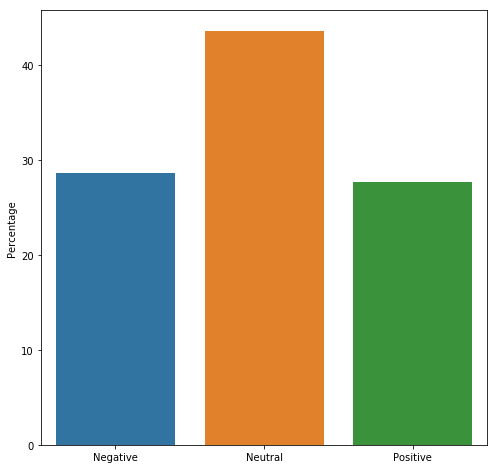

In [79]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

<b> Running Classification Algorithms </b>
<br>
<b>Used the statement column from the dataset, ran TF-IDF vectorizer, input this TF-IDF vector to the Classifying algorithms </b>

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [48]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline( [('vect', vectorizer)] )

In [49]:
train_bow = pipeline.fit_transform(train_news['statement'])

test_bow = pipeline.transform(test_news['statement'])

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect_tfidf = TfidfVectorizer(ngram_range = (1,3), sublinear_tf = True)

In [ ]:
vect_tfidf.vocabulary_

In [42]:
tfidf_data = vect_tfidf.fit_transform(train_news['statement'])
print(tfidf_data.A[:10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [43]:
train_tfidf = vect_tfidf.fit_transform(train_news['statement'])
print('Training data:', train_tfidf.shape)
print(train_tfidf.A[:10])

test_tfidf = vect_tfidf.fit_transform(test_news['statement'])
print('Test data:', test_tfidf.shape)
print(test_tfidf.A[:10])

Training data: (10240, 228132)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test data: (1266, 38854)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
feature_tfidf = vect_tfidf.get_feature_names()
print(feature_tfidf[:10])

['000', '000 10', '000 10 000', '000 abortions', '000 abortions each', '000 abortions in', '000 acres', '000 acres of', '000 agents', '000 agents more']


<b> Multinomial Naive Bayes </b>

In [ ]:
pipeline_nb = Pipeline([
        ('vector', vect_tfidf),
        ('mname',MultinomialNB())])

pipeline_nb.fit(train_news['statement'], train_news['senti_polarity'])
predicted_nb = pipeline_nb.predict(test_news['statement'])
np.mean(predicted_nb == test_news['senti_polarity'])

<b> Logistic Regression </b>

In [ ]:
pipeline_lr = Pipeline([
        ('vector', vect_tfidf),
        ('mname',LogisticRegression())
        ])
pipeline_lr.fit(train_news['statement'],train_news['senti_polarity'])
predicted_lr = pipeline_lr.predict(test_news['statement'])
np.mean(predicted_lr == test_news['senti_polarity'])

<b> Support Vector Machine </b>

In [ ]:
pipeline_svm = Pipeline([
        ('vector', vect_tfidf),
        ('mname',svm.LinearSVC())
        ])

pipeline_svm.fit(train_news['statement'],train_news['senti_polarity'])
predicted_svm = pipeline_svm.predict(test_news['statement'])
np.mean(predicted_svm == test_news['senti_polarity'])

<b> Random Forest Classifier </b>

In [ ]:
pipeline_rf = Pipeline([
        ('vector', vect_tfidf),
        ('mname',RandomForestClassifier(n_estimators=20,n_jobs=3))
        ])
    
pipeline_rf.fit(train_news['statement'],train_news['senti_polarity'])
predicted_rf = pipeline_rf.predict(test_news['statement'])
np.mean(predicted_rf == test_news['senti_polarity'])

<b> Of the different classification algorithms, Random Forest has the highest accuracy </b>

<b> In the below part, we try to come up with the dictionary for the sentiment dictionary, for both positive and negative words </b>

In [122]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [123]:
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(example))

['This', 'is', 'an', 'example', 'sentence', 'However', 'it', 'isn', 't', 'a', 'very', 'informative', 'one']


In [124]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [125]:
def process_text(a):
    tokens = []
    for line in a:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    
    return tokens

<b> By making use of NLTK's Frequent Distribution, we list the most common words </b>
<br>
<b>The expression most_common(20) gives us a list of the 20 most frequently occurring types in the text </br>
<br>
<b> We first run the analysis for 20 positive sentiment words, and then the most common for negative sentiment statements </b>

In [126]:
pos_lines = list(df[df.label == 1].statement)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('says', 652),
 ('care', 415),
 ('health', 392),
 ('percent', 337),
 ('states', 280),
 ('tax', 239),
 ('state', 231),
 ('united', 221),
 ('000', 208),
 ('jobs', 205),
 ('obama', 202),
 ('would', 184),
 ('years', 176),
 ('year', 171),
 ('million', 167),
 ('new', 167),
 ('people', 161),
 ('1', 159),
 ('president', 157),
 ('government', 137)]

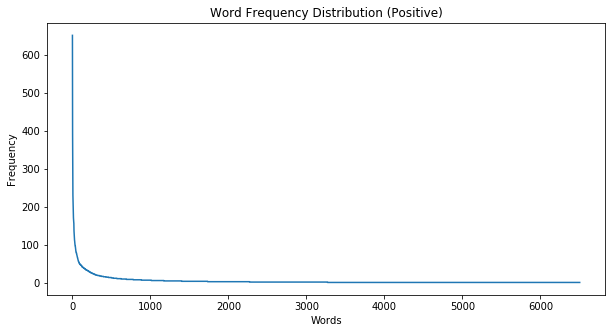

In [127]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

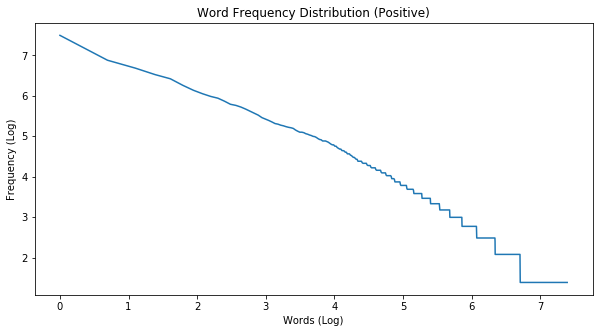

In [129]:
import math
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [166]:
neg_lines = list(df[df.label == -1].statement)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('says', 667),
 ('percent', 314),
 ('state', 244),
 ('000', 231),
 ('obama', 215),
 ('people', 199),
 ('tax', 189),
 ('president', 184),
 ('year', 182),
 ('years', 178),
 ('cut', 158),
 ('would', 157),
 ('one', 149),
 ('debt', 148),
 ('rate', 145),
 ('states', 142),
 ('illegal', 142),
 ('unemployment', 141),
 ('million', 138),
 ('jobs', 136)]

<b> From the most frequent Positive and Negative words in the statements, we can see the stance that the news headlines being taken </b>
<br>

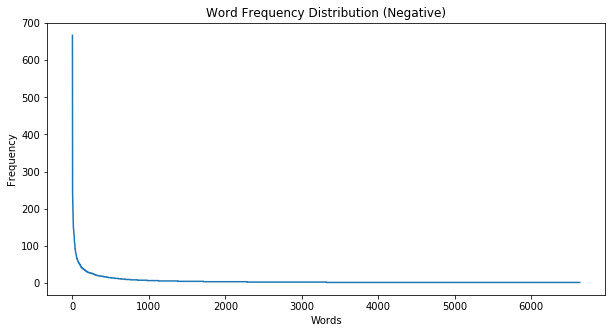

In [131]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

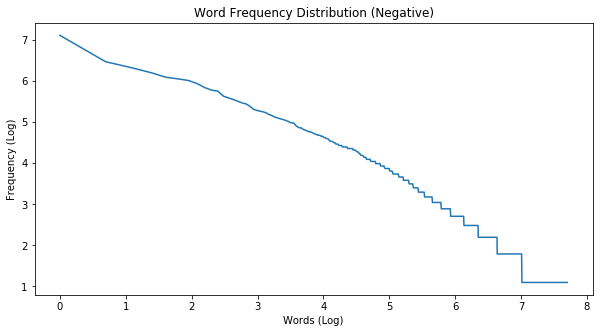

In [132]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

<b> Cosine Similarity on 
   

In [46]:
fake_news = pd.read_csv('C://Users//Supreetha//Box Sync//MSSE//THIRD_SEM//257_ML//fake_news//liar_dataset//fake_news.csv')

In [47]:
fake_news.head(5)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [32]:
fake_news.dropna()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
5,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31,0,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,english,2016-11-02T16:31:28.550+02:00,100percentfedup.com,US,25689.0,Hillary Goes Absolutely Berserk On Protester A...,0.000,http://bb4sp.com/wp-content/uploads/2016/11/Fu...,0,1,0,0,0,bias
6,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f,0,Fed Up,2016-11-04T19:40:00.000+02:00,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T02:13:46.065+02:00,100percentfedup.com,US,25689.0,BREAKING! NYPD Ready To Make Arrests In Weiner...,0.701,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
7,b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4,0,Fed Up,2016-11-05T01:19:00.000+02:00,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T05:59:07.458+02:00,100percentfedup.com,US,25689.0,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,0.188,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
8,a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6,0,Fed Up,2016-11-06T23:54:00.000+02:00,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,english,2016-11-07T10:20:06.409+02:00,100percentfedup.com,US,25689.0,BREAKING: CLINTON CLEARED...Was This A Coordin...,0.144,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
9,f54d8e13010d0a79893995ee65360ad4b38b5a35,0,Fed Up,2016-11-07T02:43:00.000+02:00,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,english,2016-11-07T10:20:27.252+02:00,100percentfedup.com,US,25689.0,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",0.995,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [33]:
fake_news.type.unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

In [48]:
fake_news_train=fake_news[['thread_title','text']]

In [49]:
fake_news_train.dropna()

,thread_title,text
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...
5,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...
6,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...
7,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...
8,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...
9,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...


In [50]:
fake_news_train.head(5)

,thread_title,text
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...


In [19]:
import re
import math
from collections import Counter

In [20]:
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

In [21]:
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    return Counter(words)

In [39]:
def clean_text(raw_text):

    cleaned_text = re.sub("[^a-zA-Z]", " ", raw_text)
    cleaned_text = cleaned_text.lower()
    cleaned_text_words = nltk.word_tokenize( cleaned_text)
    stops = set(nltk.corpus.stopwords.words("english"))
    words = [w for w in  cleaned_text_words  if not w in stops]
    return " ".join(words)

In [56]:
def get_result(content_a, content_b):
    text1 = content_a
    text2 = content_b

    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)

    cosine_result = get_cosine(vector1, vector2)
    return cosine_result

In [55]:
for index, row in fake_news_train.iterrows():
    sentence1 = str(row['thread_title'])
    sent1=clean_text(sentence1)
    sentence2 = str(row['text'])
    sent2=clean_text(sentence2)
    #fake_news_train['Similarity_Score']=get_result(sent1, sent2)

0.11547005383792516
0.5951700641394974
0.3713906763541037
0.3666793988112845
0.08415552848449262
0.3431317581537582
0.34460393308462983
0.1422952349318048
0.11521430589638529
0.3762266961123676
0.0
0.03202497384521454
0.15691754388177714
0.4605661864718382
0.12909944487358055
0.39467610868816316
0.12909944487358055
0.413610628242576
0.35218036253024954
0.28306102965902585
0.36232865092627065
0.3227486121839514
0.2723523897009611
0.3414605234565617
0.2993421700446249
0.05198752449100364
0.36083086759455824
0.19999999999999998
0.12171612389003691
0.5846434037980074
0.4394353744020411
0.641167143444007
0.40050093945740706
0.15467205622243652
0.49008327027635545
0.540867186500379
0.3209703693831847
0.19877626530015466
0.38338672716780303
0.5041449618895588
0.3681616741809012
0.3249182166443294
0.24826441574616806
0.18150336025973468
0.0
0.17928429140015903
0.3598560863424403
0.1765469659009499
0.24440612949197513
0.2997658993010635
0.27524094128159016
0.2983189693559895
0.371897325055393
0

0.37105411926064086
0.5345224838248488
0.1868321979755841
0.3174548865219621
0.13871914988396253
0.7181848464596079
0.35942537872389224
0.28342171556262064
0.5833333333333334
0.08954511491955588
0.21843290446712282
0.5217758139277825
0.20644117909511076
0.5212982933415373
0.6537014466829248
0.4481482121839626
0.41851106932973126
0.33954987505086615
0.4399465283756371
0.328047371219968
0.3402277522683397
0.4996018790673766
0.5218664192928035
0.45655194678031885
0.43246144425065086
0.04181210050035454
0.5872202195147035
0.2696566072596199
0.16783627165933782
0.3252478493733857
0.2877719434073984
0.2169832068669297
0.6963106238227914
0.5568691451658623
0.41905817746174695
0.4611429759107164
0.6236095644623236
0.28146853649571035
0.41195267321844914
0.24967703225419782
0.35439179203278526
0.17085642859406605
0.4823787007632909
0.4324499820938683
0.5541741646263714
0.3721889173040143
0.29561468440591315
0.41363559164239
0.4861418300116442
0.43520377329983095
0.0928496701805677
0.30336179824

0.3403656166784398
0.0
0.5044152421997279
0.34645116407786697
0.4467135561824145
0.4380612452434268
0.4505766568204545
0.0
0.5396357956947895
0.3584640895494324
0.4948716593053935
0.5416114030164012
0.3990450969823695
0.0
0.5011614417507341
0.5586855134724511
0.6652991438591156
0.38245382526876276
0.5583978134638251
0.6286185570937123
0.48696470436959827
0.32171074478781353
0.22145461294330657
0.36367158663471594
0.41234489030827143
0.5157815231179784
0.09428090415820634
0.3600180013501125
0.0
0.5547001962252291
0.3163084672471978
0.39037765240388234
0.16709347060920104
0.3288161116863061
0.5699228281751731
0.41352766552421205
0.495429581919538
0.5983233804389635
0.0
0.30761366716109845
0.08793155726408239
0.6062754572551409
0.6416236526819377
0.035245368842512066
0.3915780041490244
0.47331913943124887
0.46131568442325577
0.403209824506004
0.0
0.0
0.07726674092862557
0.3102210441557701
0.370417037083889
0.4296689244236598
0.1305857250198021
0.5859991481417441
0.0
0.41478978024748003
0.

0.4979376352715817
0.41147260114439865
0.40350105590873064
0.3027913048808143
0.2643274401820359
0.27116307227332015
0.3314683161860167
0.4306163763446055
0.42831865861221113
0.21773242158072692
0.3185509678232411
0.21105794120443452
0.3546040716334876
0.23419888445421266
0.5
0.20739033894608505
0.36864805268554507
0.48384656487472866
0.41063154649749295
0.29296938862328215
0.30261376633440124
0.3870693672140189
0.349046876269824
0.17677669529663687
0.46028730894916164
0.19771864882368606
0.33084657994221345
0.2038588765750502
0.3815992368022896
0.441054277135977
0.36363636363636365
0.4156676264663836
0.3484365738222833
0.13234444452945737
0.3748789971250483
0.3364632924552266
0.38827360223560126
0.2279211529192759
0.351972576457172
0.49149741618481363
0.4993069989739546
0.22225022225033336
0.4179271141913149
0.26562660124542986
0.5053394287949117
0.2528608687120868
0.24806946917841693
0.4303314829119353
0.5907510717502449
0.39290903532517635
0.20519567041703082
0.27121251999684587
0.4

0.323901106432018
0.1762280852423047
0.2734554927728036
0.19924801984937585
0.2923654226138339
0.03139210728986741
0.2666851230231733
0.4901018733611394
0.3223291856101521
0.27293450357776905
0.14197690920741865
0.2867786993114753
0.40522160042937666
0.0
0.1620509308880411
0.31211457344739685
0.06108472217815261
0.04372694694466261
0.43872679768566536
0.10934412306094023
0.3987895170141852
0.22230800575069137
0.1422488059151916
0.4937120287501702
0.4667121241640146
0.372387484580831
0.21268961801272412
0.37257570166870446
0.14790883223702933
0.3623058220410811
0.0
0.05860984988734226
0.09395575350035362
0.08980265101338744
0.13525044520011484
0.34606144099099245
0.4573252031797663
0.32348719116573565
0.1694264766500237
0.10567049305145204
0.27586206896551724
0.1994310088043664
0.5773502691896258
0.13018891098082389
0.12235825144876666
0.20750420835506328
0.15015053622606
0.21379652762353413
0.3205936478817537
0.3302520662903542
0.29294300271021906
0.30619759579397604
0.2723736697251918

0.20541200750444025
0.30279996244861596
0.11846207846084769
0.22858179532783782
0.4421944389955994
0.3582705030528656
0.2619047619047619
0.42339019740572553
0.4928834052227878
0.392555553488215
0.3771265165018483
0.2703327416362964
0.22072575925885432
0.3432032364918221
0.32161457389956005
0.43825049008927763
0.3779274448952016
0.16543403837370219
0.3049668334021877
0.07293249574894729
0.29095718698132317
0.19096396641051547
0.3364502307384781
0.2138443426239282
0.14503654265564117
0.4458298146863684
0.385431442900267
0.2913324701272933
0.16165745460966138
0.15205718425394113
0.30778869014456456
0.3291540093383166
0.31145857161752355
0.17556021771657443
0.19493588689617927
0.05363453244727532
0.19245008972987526
0.2073221072156823
0.30341364322535325
0.15203960843648034
0.13168538439184413
0.16972502573910517
0.15565234958592114
0.28040315476228483
0.17795130420052185
0.26894744944055277
0.037375727318564735
0.39879193162646726
0.4679997646630346
0.2609534389698294
0.2899103782969038
0

0.22065615463154212
0.2809387802771537
0.2066377715165401
0.0
0.3457403994922485
0.0772795578385468
0.24744282400854606
0.27636762921528335
0.24653342054454627
0.19170644527903724
0.37037037037037035
0.19947099516133243
0.10259783520851541
0.18523964340873708
0.2429186770650168
0.3287290810848382
0.12267426770622006
0.2916008503084672
0.16533711076689991
0.3810003810005715
0.4459343777894762
0.14560880150912264
0.224630175168721
0.3042903097250923
0.14030911767010154
0.2449894717530557
0.27972711943222967
0.30062695993150196
0.34644311843150905
0.4883862905055044
0.04674110778205597
0.06781570489759663
0.28840895184148524
0.13431526841909527
0.38154079843117505
0.45105489780439517
0.20377802831623898
0.43518643044735544
0.37896526330388836
0.4557617587376439
0.3616385753170583
0.08614881178267075
0.24456469021831553
0.30406056993414854
0.22262914844148496
0.251902280868858
0.1988844040654513
0.2821226944674319
0.3655107299727037
0.3642586349825095
0.3015838377892887
0.38185289729598404

0.3674521697397003
0.10425720702853737
0.2989866392049206
0.26593487520457093
0.21320071635561047
0.12072654548783006
0.14969623771302396
0.29634874834417857
0.30352683198664504
0.22268088570756164
0.2801241155340992
0.2662078083872194
0.28803291992923824
0.15430334996209188
0.3847023381825009
0.440434536742951
0.433916695990787
0.627885706767672
0.375
0.4714045207910317
0.3499092540543186
0.34885116732465393
0.0
0.48997894350611126
0.4625101275223017
0.3121097258563482
0.12548261415538253
0.4134344328947823
0.2780353372005439
0.15512630699850574
0.3012267656143291
0.3416156390057077
0.1466471150213533
0.28867513459481287
0.2788866755113585
0.33739293426931993
0.0
0.2770350348527718
0.3751876407422901
0.39343230872880863
0.28743030285918214
0.17869590224907952
0.33513244685037125
0.34628650983697723
0.3557340040884367
0.2547640291245577
0.47411187208065214
0.3692744729379982
0.1634011202231184
0.2548603747614693
0.09267030948228232
0.3237161531434671
0.33084657994221345
0.6002450479987

0.0
0.0
0.17436685601070914
0.10345706314395887
0.08794080883518106
0.21362223356400764
0.2603402888208892
0.0
0.1328103494193392
0.18477337812706932
0.2986035610760637
0.19523167001328925
0.15801596956131098
0.21131214894353906
0.14952043467208553
0.0
0.12945955560063094
0.0
0.17622684421256035
0.0
0.4097224315030393
0.22821773229381923
0.0
0.0
0.14762698191950227
0.0
0.20591655645557924
0.2428160180472097
0.4334607234315054
0.19112739302699866
0.09879231820799261
0.3697463893899009
0.5366222766806089
0.13372812598265227
0.37274965820548744
0.11215443081840887
0.15570795240755372
0.4857345166444114
0.036037498507822355
0.08844124207824766
0.16532004626856694
0.07610194341477616
0.43033148291193524
0.2572973033115514
0.17118419700436513
0.2459209978365783
0.629940788348712
0.8860760232362958
0.3287979746107146
0.25819888974716115
0.4049155956077707
0.0
0.4494665749754948
0.805906034276003
0.4605661864718383
0.6346177794762744
0.5715476066494082
0.3692744729379982
0.23122341194226784
0.

0.2921584494894108
0.4565996001319209
0.5362882079785147
0.3733006833947206
0.19402850002906638
0.371124159867426
0.274525532694725
0.5416079016362072
0.33989995234030723
0.2716072381275556
0.5762269542970456
0.2589661986891186
0.3681809130722737
0.2482273244086317
0.3327622934024638
0.41147559989891175
0.3029946638351818
0.38360787696567333
0.3016806854192959
0.22291983207813149
0.2519763153394848
0.45124069832119656
0.2834217155626206
0.307852522390846
0.3200806963882638
0.3490732770083736
0.34151450937027694
0.3593757690721877
0.3707336495572356
0.37412122957848243
0.368970905561327
0.5470527092215764
0.2844598938210105
0.22677868380553637
0.5130972078803637
0.16998207314853409
0.41889205354092457
0.42031353498351565
0.5182002205050366
0.3565120479536904
0.4979320443139977
0.5423912614520257
0.3858387328635861
0.3376497126427054
0.0
0.4263153171024034
0.3675485361946541
0.12774403257689898
0.5273451801680465
0.31871341600095876
0.32904509826424905
0.4004308024942723
0.07927746338725

0.26462238932441323
0.28002324623712893
0.16097114105751667
0.337099931231621
0.14580296087995107
0.19835388147218594
0.5433884886490595
0.24270859122155472
0.44694920671214383
0.45706896310845374
0.16684377470420886
0.18197361122800387
0.44266429090036313
0.3263569759322527
0.44694920671214383
0.21510201696428247
0.30899874755199347
0.2244396006242174
0.12501733903603302
0.22690109788561372
0.3920438329509228
0.3412618163949676
0.13794014696151088
0.10661929084080464
0.2093453539268351
0.46073929912086503
0.053418872014333596
0.16351748504193214
0.22953904252438354
0.3196215228302976
0.23380299420005501
0.0
0.0895565139540263
0.2777940953522052
0.4475373449780591
0.35592197883175447
0.1936870004976636
0.05133270023393453
0.16100910702178953
0.28637174477718363
0.26043983992510544
0.3261229812006693
0.28631856346244444
0.24883892131574564
0.3623148311708444
0.6469966392206304
0.3635575475915049
0.16575721629245993
0.2174839535988637
0.09571097515242913
0.2930317743033026
0.242713661896

0.9999999999999999
0.9999999999999998
0.1435172353106082
0.6434894520877869
0.3484365738222833
0.4499250633388008
0.435285750066007
0.7102208242284351
0.8164965809277261
0.8340576562282991
0.578687658679514
0.573382179080996
0.6781326902444914
0.7210366836744467
0.25925925925925924
0.8944271909999159
0.5348383021589468
0.5217491947499509
0.6219974732749121
0.5516772843673704
0.17190354104313227
0.6111111111111112
0.4333333333333333
0.9045340337332909
0.48280454958526764
0.5843065474681431
0.5111012519999519
0.6035098490754185
0.34382790285960657
0.6592342530872155
0.5120915564991891
0.4395958203783535
0.0
0.9128709291752769
0.3962659626113175
0.9999999999999999
1.0
0.5879747322073337
0.06685113318310745
0.480576182465678
0.6809849176121797
0.5773502691896258
0.9999999999999999
0.5852304798861195
0.3512196793431353
0.5408987230262505
0.3358232527791279
0.3358232527791279
0.2394737360356999
0.0
0.38626965196845364
0.4219079628472589
0.3954557894193501
0.46352358236214436
0.29546842014263

0.3111879571320709
0.4098865611446574
0.49978387723217654
0.4584799084310163
0.35283685573447277
0.4007521159884994
0.42521971746155085
0.5550542978867158
0.3928371006591931
0.4760705440701531
0.3963762451287451
0.38703853024412366
0.5026246899500345
0.3577708763999663
0.3833259389999639
0.5284573803625948
0.2445441474593435
0.37908769828787275
0.21938401861059392
0.4156306234697784
0.2309401076758503
0.301417166426293
0.16000013319475528
0.28011206724483134
0.316602665693264
0.3883215816738117
0.3303964185222347
0.18691605444209344
0.3224574077934151
0.4486993590464023
0.14349920066683505
0.1641680573033082
0.4269562819149832
0.36466614551844545
0.36754159395784103
0.2548498648385896
0.2739828957871112
0.11980845957463075
0.32427221756276076
0.2646571656692613
0.12458356352887047
0.3779644730092272
0.45990933721097976
0.2950775524881938
0.1320989873168695
0.5246431181354001
0.2776945093626455
0.443452219100418
0.5206454804929895
0.1622466872972783
0.13102435641608368
0.416936350271097

0.34875969473704277
0.3593917947859062
0.2142478940425129
0.4530293611834014
0.5259400186578376
0.11088570839822179
0.4596194077712559
0.27176154465304597
0.2075498086651083
0.16012815380508713
0.65
0.30717074198936906
0.4812339967663481
0.4171543635860219
0.5301093449496964
0.5144957554275266
0.5521714861007723
0.31229713179130186
0.3985405706652278
0.38095972949996415
0.061666305341717374
0.36776414156615705
0.2737820708611931
0.5495629814616046
0.4454518381236136
0.12171612389003691
0.01588051978109495
0.24748779777744864
0.0
0.6082218703878167
0.11539942274527012
0.3061862178478973
0.029053475832104297
0.22978728816494134
0.28705541944927354
0.2561193529864
0.0
0.36468106338590983
0.0
0.45709062119946053
0.27504098416018735
0.49458607402087723
0.058025885318565944
0.346834329511112
0.21260985873077543
0.3148456287132618
0.11258799375612023
0.42678312847863165
0.3674521697397003
0.07494457680132904
0.3679541422172961
0.0
0.09329609593265539
0.21701025567230922
0.04558659878036995
0.

0.4657971306985123
0.5231143743471868
0.5395630988493983
0.2667891875399663
0.6109598099719177
0.4493585171364586
0.5459277747820811
0.5091952262083295
0.7152395611512589
0.3561410088363889
0.5960117982212085
0.4872637037858149
0.353538235815385
0.4310300618694595
0.5003594795201594
0.5249007842757842
0.3613243134801244
0.29524069878307374
0.3538766542528255
0.5506821670459082
0.1196524250483734
0.3791428475251943
0.2946837874735029
0.38528238690883704
0.37605071654517747
0.39174223033568495
0.5148697981926198
0.45378188986016443
0.6957192771141482
0.5897624848171971
0.36350107326771175
0.30082072632792145
0.43041423101055837
0.36889064013539696
0.4167104910586931
0.2552495926943608
0.43875236638699655
0.5206585338022972
0.48908348756353337
0.29831980992671103
0.28807145058071487
0.42669419033768446
0.2846535929585111
0.4662757001419619
0.5470538425133552
0.4767312946227961
0.4521454233661641
0.3779274448952017
0.500323909154328
0.4583254745962746
0.528114254034486
0.33444683361100663


0.3038218101251
0.4200939098872802
0.4429403980178329
0.4882864377803228
0.4469492067121438
0.4689882848867915
0.546665388852788
0.6066388981001565
0.4264014327112209
0.3566489765333858
0.31694044524307863
0.33124933750198743
0.3041418392065072
0.4260989130330459
0.3410056948243269
0.41173082679723416
0.2464944090053283
0.451275300894902
0.40348298602723565
0.4990834089450871
0.12185724408107547
0.3232299675777271
0.43094289427816274
0.4596936396596563
0.3863500558929526
0.2114564529129753
0.691880064156029
0.4739911933815327
0.25753734910142717
0.37529331252040077
0.436190039585119
0.5128883747947717
0.3634320360965361
0.19158478757973946
0.3442641454720272
0.3727742830352559
0.3324039017958545
0.4370786380607689
0.4661384642714042
0.3831976804864713
0.24366985862022408
0.2769633419192636
0.3619850079195533
0.5137494315714509
0.2994763741177399
0.4273434600639159
0.49781910442156246
0.4771652785948902
0.42469148825012076
0.29699877024201293
0.2266370798680294
0.3419735023194923
0.4909

0.2731791823540765
0.6274950199005567
0.1980845825760407
0.4291975376394761
0.5124424337068006
0.25065132546332514
0.07390062456130514
0.35824387672879376
0.15430334996209194
0.19011727515734336
0.6225607967958171
0.49852724275079074
0.41203661271322223
0.4497120149145933
0.6816087174369228
0.4821295124520226
0.276247310054915
0.22687130324325755
0.32382985009427484
0.230354302239204
0.12807576736885198
0.31008683647302115
0.4866642633922875
0.29254889645883964
0.48416483186574427
0.47249045754631347
0.29361297955184756
0.5459486832355505
0.5433239299507641
0.4822110248920824
0.5241816051142838
0.1951800145897066
0.33846175291241415
0.5070925528371099
0.3843711067980367
0.26424503100148833
0.4869258405481767
0.39931042923725124
0.16352471217437659
0.44655350127227206
0.5446144859178875
0.3945575695328574
0.7384559706196481
0.37871664185868187
0.06641388218181848
0.36112961215876177
0.09805806756909201
0.20001384226737998
0.22783897474717274
0.31639323668311153
0.6013377943029548
0.3223

0.2357022603955158
0.3208582308244514
0.3603525171094322
0.31622776601683794
0.6157439037929581
0.3495633186072456
0.40357088364756794
0.4201861733011487
0.564861572955389
0.4394267158328472
0.6435856655959434
0.3483169064023021
0.436365108334776
0.3758710813130506
0.582944830101989
0.6701293268802347
0.6708203932499369
0.7071067811865475
0.514585318620028
0.41824531107335744
0.6708203932499369
0.4085297439895141
0.2886751345948129
0.36404206005735584
0.24999999999999994
0.4880952380952381
0.45036043257680747
0.5703619909934138
0.33432031495663067
0.6467397273932481
0.6645312119093666
0.30235394895347606
0.6293945830838247
0.5911598942472046
0.6190534518285208
0.6434778271733331
0.3104602102825332
0.3839908587347317
0.5219035872175698
0.5320820287008927
0.34299717028501764
0.31622776601683794
0.41318081145604607
0.696985016836869
0.4501289079311328
0.0
0.6410972567400522
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.2886751345948129
0.42732738696715183
0.3774447625180881
0.5386607841810166

0.3183035070396152
0.19120016188287228
0.3914894054613201
0.2848097700568922
0.23810162768378806
0.3618227252354761
0.39950974773064724
0.4848748569919926
0.3161691129947222
0.31913678334595824
0.34721483196269676
0.26052156521826575
0.26833674421318243
0.30838650246487803
0.41073850361886594
0.46701201738600573
0.16004338954431446
0.26167462454318063
0.25971835828908535
0.2519763153394848
0.18013975442924254
0.3452470892691061
0.5071505162084872
0.37500854165480435
0.45657405735341133
0.4645983233112327
0.37696568314473655
0.1685341385848713
0.245500718341163
0.3396831102433787
0.36496221393602835
0.39111476012909935
0.538349662655636
0.309426373877638
0.5203657382550588
0.5957554687344992
0.2475067106324494
0.37013115659924134
0.3653621835366779
0.4294778451936666
0.5809475019311126
0.5811144912835734
0.4944866059358689
0.34477421300110317
0.24705069908683483
0.46797402218036804
0.14100337200377044
0.3234083858439362
0.3103217664806513
0.41617316406186955
0.0981465809623833
0.2888411

0.19275882159515373
0.22360679774997896
0.0
0.1822773828538776
0.22926536851887747
0.1018266349953196
0.3803194146278324
0.12880163722232754
0.3351775152257364
0.6637918509160179
0.296837695230403
0.37161845666190535
0.34655164004183603
0.03946685189819292
0.32010046511549123
0.32274861218395146
0.5948118774794626
0.6286185570937122
0.1846372364689991
0.5357142857142857
0.3205132320860016
0.04233337566673017
0.39629696195060854
0.45518323873130234
0.11504474832710555
0.7970533969860858
0.8366600265340755
0.6708203932499369
0.30460384954008574
0.5291502622129182
0.46243547127090956
0.40350010392187685
0.34565056491014173
0.6564879518897745
0.11952286093343935
0.38138503569823684
0.32617608521576047
0.24576957615571215
0.5033670414105182
0.42254607720606485
0.14261480656245853
0.2598076211353316
0.3942109826610298
0.0
0.49167910711241425
0.44145917590405204
0.15321285325897388
0.21994295969128605
0.32998316455372223
0.36075679591667004
0.7284927963857741
0.4067109885465671
0.286769667338

0.530391386513824
0.34391906967288227
0.4076495978254712
0.3718879583890439
0.27465894800419094
0.2309401076758503
0.24833492615022668
0.2804586137920873
0.21281413268968713
0.22706756776339054
0.194370395755806
0.3081056333492893
0.2717914161090705
0.335826511926589
0.28315750690980523
0.3200136340073865
0.3323580998178593
0.3353521420686487
0.17579101442559614
0.3883215816738117
0.21854065019678828
0.36087748355852695
0.3946007300091433
0.17858460678838103
0.4540361597585805
0.38917796178383535
0.27791324609979207
0.3380617018914066
0.2784829958445936
0.09912695235553012
0.18224020510156705
0.40673793275026804
0.20178357806781544
0.3600664888153091
0.49565627427368086
0.14494275891311212
0.2516313784011294
0.2943826087848329
0.18171094607790775
0.5430450802499489
0.15185132047305933
0.1521118225902954
0.13055824196677335
0.3454408611617303
0.3227635331803387
0.4616033363886522
0.30751920724927917
0.11481659862857987
0.4814038951990959
0.5006939628599933
0.16498992017908773
0.51023064

0.05169341375966832
0.612263514385363
0.3608049059813075
0.3291091890434819
0.13916151834992893
0.15470907239054388
0.3382810207457836
0.35469924467145836
0.2435533469029332
0.3201761453332282
0.23512537364420621
0.39391929857916763
0.17187418044199626
0.3297332614286893
0.018886423322335786
0.24017652108789397
0.23220893480841853
0.12003841844183591
0.0
0.0
0.48291342317255004
0.028988551782622423
0.44763689289287567
0.33925066817085947
0.32250133580711593
0.0
0.0
0.09602765994967198
0.22360679774997896
0.5136695068008398
0.04464330201216167
0.031764266241572
0.43145549730400484
0.03714547257943237
0.0
0.0
0.18879503265826578
0.3508565290134527
0.0
0.0
0.0
0.17960530202677488
0.02031111159255969
0.0
0.7117944760580747
0.049613893835683376
0.049613893835683376
0.03205646912228967
0.03984886094904202
0.049088069367381595
0.2729780564793208
0.0
0.07265696587939381
0.01992443047452101
0.01250977708401336
0.03658808666323012
0.0
0.03984886094904202
0.0
0.03197647396955397
0.459796444349344

0.2653179881592483
0.4001052354661722
0.43237120443002236
0.1606909961514069
0.5733381323378793
0.18244857578521204
0.3720786497928146
0.372677996249965
0.22141240439467028
0.5533459025519908
0.24529262467676904
0.4385498339767048
0.02039118475715464
0.2668802563418119
0.4187804047607203
0.44342892720609245
0.10530400393442725
0.3303874152504059
0.3954824982302079
0.4045867968563435
0.3150951102331632
0.14985653006353847
0.4398485633535138
0.4144248634911699
0.22880215766121473
0.3838831602697432
0.3045263421979811
0.3469657515444188
0.15558196831688278
0.04483358396622203
0.3266372899592439
0.22627640481942107
0.34417038660688354
0.33700420499620193
0.3077839204767459
0.23509083975369338
0.35391919864828275
0.39828770195071284
0.19441007070250035
0.0
0.4323954347189756
0.46709936649691375
0.4498380376198594
0.5678885630303184
0.3307189138830738
0.27681826617913324
0.14814814814814814
0.42562826537937437
0.5881176352917641
0.33220529851337466
0.2899740640333983
0.6277266458155404
0.538

0.3553345272593507
0.17149858514250882
0.18333969940564224
0.21081851067789195
0.31352985643122794
0.24494897427831777
0.20801257358446093
0.16116459280507606
0.22677868380553634
0.14509525002200233
0.424788823481098
0.4029114820126901
0.07106690545187015
0.0
0.1951800145897066
0.0
0.19611613513818404
0.0944911182523068
0.08333333333333333
0.03235924008452867
0.6085806194501845
0.0
0.5270462766947299
0.3992978531249624
0.3702180485994327
0.20701966780270628
0.08247860988423225
0.3952847075210474
0.14509525002200233
0.45883146774112343
0.21764287503300347
0.22360679774997896
0.08333333333333333
0.0
0.07412493166611012
0.06537204504606135
0.24333213169614376
0.1543033499620919
0.07905694150420949
0.12909944487358055
0.282842712474619
0.31201120713442876
0.4463036991443369
0.474903998539896
0.2580716668324418
0.3692844526548553
0.20102558659485573
0.4302822993603817
0.5334215094657592
0.38879414793723677
0.464843351714592
0.34755779680640947
0.3612557399195147
0.41176605257267385
0.340153

0.37424059428255985
0.2422507915557546
0.1324295304292306
0.42796049251091284
0.43604079963619047
0.7366144832006676
0.44543540318737396
0.1841149235796647
0.3384798365000707
0.4078271987680356
0.4950737714883371
0.09972337429718005
0.24545784641604235
0.19839002137983247
0.5496565719302984
0.40009880202694836
0.15378117130731137
0.4481404640496907
0.5530100413375021
0.6064784348631226
0.6341072860401503
0.48333333333333334
0.09869275424396534
0.036760731104690386
0.30037105765573974
0.37151880838356854
0.5592327894010801
0.48405539293655464
0.28426762180748055
0.31187247023418013
0.4865062298556018
0.5974740397386893
0.5202312652994029
0.5471101369155106
0.48956502432616467
0.20529392068381325
0.5336778770023405
0.30304576336566325
0.24688535993934707
0.5797710356524485
0.09869275424396534
0.20926772002962818
0.541136475631577
0.4767312946227961
0.4253287230050015
0.6432579269829468
0.345547370232544
0.19069251784911848
0.0
0.5879572942861634
0.5079919821419582
0.48564293117863205
0.5

0.08498751295626061
0.06519028566758683
0.5077446527803016
0.42843651767672963
0.39606667605491397
0.32132612407252586
0.3708274733930257
0.5984501456659633
0.6271591171886066
0.25350555338944436
0.35844450723319865
0.241343441511827
0.4962209651307029
0.38722762748466716
0.4398186312335886
0.3334235087261187
0.4542905930426341
0.27998340888215884
0.5834333819291009
0.19074647397804817
0.36830036830055246
0.25
0.42781756443707836
0.3256256212897556
0.08402778978449299
0.2670406382909188
0.28287635018806073
0.3803462682032406
0.5876755595035189
0.3946007300091433
0.5085638206635896
0.33979981978478624
0.4978438881870134
0.39156690547112727
0.29277002188455997
0.1227518799616567
0.3294953842951177
0.34740416688982556
0.22504665034619234
0.23017413505937437
0.48376532787691456
0.3693241433226384
0.37882692707196663
0.36577096099121487
0.16898159235484367
0.6258676351147411
0.4719742731466322
0.371590247439778
0.3029129782651013
0.30288015174367244
0.35805743701971643
0.32608263222246087
0

0.2760660629842787
0.36410455347429593
0.4995923358474285
0.533056027059393
0.3102025143952879
0.4273738431706882
0.45027270863734503
0.42378277069118075
0.5611233712393418
0.2816952728049368
0.4694814629319215
0.2924488259328009
0.3881117796392108
0.5145366803427123
0.1819472429482086
0.21380899352993948
0.3360107525161235
0.3404618359890842
0.22846078232173078
0.3835619022971279
0.5217237205808197
0.28607725128818
0.3628439413131071
0.1508509365462807
0.4222489812943552
0.3502073841753286
0.51604684654214
0.3799660121321062
0.3203841216437853
0.2259532082548843
0.329849181017937
0.23408229439226114
0.5415192183592221
0.2899927618709944
0.5601383936852761
0.4322745815666393
0.404965970842043
0.32595482056953107
0.28426762180748055
0.3903600291794133
0.1867718419094071
0.2118137255438767
0.0
0.4267340824297726
0.35656037155560344
0.13576884666042613
0.26013299085723596
0.451697051905646
0.0
0.0
0.14433756729740646
0.0
0.0753778361444409
0.14433756729740646
0.0
0.0
0.17677669529663687
0

0.46140150019593257
0.27343437080986527
0.2979270115341687
0.09112113780030293
0.3274867800668584
0.31977623492593577
0.20539595906443725
0.4989701327891659
0.45626281992946893
0.3304003941964585
0.4146517295735855
0.3972986148014952
0.30666575802872975
0.1403340809174964
0.45655194678031885
0.2214546129433066
0.09540823245006572
0.3552361863487489
0.417555272211418
0.14044937663535667
0.277572601235535
0.4709381067846824
0.1870439059165649
0.3956837835515332
0.2807449625374386
0.34079908829549843
0.3090093180992076
0.6191391873668903
0.3579352554007827
0.5382630646865698
0.3875851160999635
0.2117814440465992
0.4184606665459301
0.37383358970942004
0.20786233678772184
0.47364562275300215
0.5683014228180617
0.5015827833194747
0.2870009643248602
0.14336088815212544
0.3879292326456054
0.4898195836919326
0.4980119205559973
0.2781813964684457
0.018018749253911177
0.08571428571428572
0.3944053188733077
0.11113247657830429
0.10137145616929408
0.3483665071458088
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
export_csv = data_final.to_csv ('C://Users//Supreetha//Box Sync//MSSE//THIRD_SEM//257_ML//fake_news//liar_dataset//train.csv',sep='\t', index = None, header=True) 